# 回帰 (regression)

* 黒木玄
* 2022-07-13～2022-07-18

$
\newcommand\ds{\displaystyle}
\newcommand\op{\operatorname}
\newcommand\R{{\mathbb R}}
\newcommand\Z{{\mathbb Z}}
\newcommand\var{\op{var}}
\newcommand\cov{\op{cov}}
\newcommand\std{\op{std}}
\newcommand\eps{\varepsilon}
\newcommand\T[1]{T_{(#1)}}
\newcommand\bk{\bar\kappa}
\newcommand\X{{\mathscr X}}
\newcommand\CP{{\mathrm{CP}}}
\newcommand\Sterne{{\mathrm{Sterne}}}
\newcommand\Wilson{{\mathrm{Wilson}}}
\newcommand\Wald{{\mathrm{Wald}}}
\newcommand\LLR{{\mathrm{LLR}}}
\newcommand\pdf{\op{pdf}}
\newcommand\pmf{\op{pmf}}
\newcommand\cdf{\op{cdf}}
\newcommand\ecdf{\op{ecdf}}
\newcommand\quantile{\op{quantile}}
\newcommand\Bernoulli{\op{Bernoulli}}
\newcommand\Binomial{\op{Binomial}}
\newcommand\Beta{\op{Beta}}
\newcommand\Normal{\op{Normal}}
\newcommand\MvNormal{\op{MvNormal}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\Chi{\op{Chi}}
\newcommand\TDist{\op{TDist}}
\newcommand\Chisq{\op{Chisq}}
\newcommand\LogisticModel{\op{LogisticModel}}
\newcommand\pvalue{\op{pvalue}}
\newcommand\confint{\op{confint}}
\newcommand\predint{\op{predint}}
\newcommand\credint{\op{credint}}
\newcommand\phat{\hat{p}}
\newcommand\SE{\op{SE}}
\newcommand\SEhat{\widehat{\SE}}
\newcommand\se{\op{se}}
\newcommand\sehat{\widehat{\se}}
\newcommand\logistic{\op{logistic}}
\newcommand\logit{\op{logit}}
\newcommand\OR{\op{OR}}
\newcommand\ORhat{\widehat{\OR}}
\newcommand\RR{\op{RR}}
\newcommand\RRhat{\widehat{\RR}}
\newcommand\hA{\hat{A}}
\newcommand\hB{\hat{B}}
\newcommand\ha{\hat{a}}
\newcommand\hb{\hat{b}}
\newcommand\hc{\hat{c}}
\newcommand\hd{\hat{d}}
\newcommand\hp{\hat{p}}
\newcommand\hq{\hat{q}}
\newcommand\hz{\hat{z}}
\newcommand\ta{\tilde{a}}
\newcommand\tb{\tilde{b}}
\newcommand\tc{\tilde{c}}
\newcommand\td{\tilde{d}}
\newcommand\tp{\tilde{p}}
\newcommand\tq{\tilde{q}}
\newcommand\deltatilde{\tilde{\delta}}
\newcommand\tx{\tilde{x}}
\newcommand\phat{\hat{p}}
\newcommand\qhat{\hat{q}}
\newcommand\ptilde{\tilde{p}}
\newcommand\qtilde{\tilde{q}}
\newcommand\Wald{\op{Wald}}
\newcommand\Pearson{\op{Pearson}}
\newcommand\Fisher{\op{Fisher}}
\newcommand\Bayes{\op{Bayes}}
\newcommand\Welch{\op{Welch}}
\newcommand\Student{\op{Student}}
\newcommand\FisherNoncentralHypergeometric{\op{FisherNoncentralHypergeometric}}
\newcommand\xbar{\bar{x}}
\newcommand\ybar{\bar{y}}
\newcommand\Xbar{\bar{X}}
\newcommand\Ybar{\bar{Y}}
\newcommand\dmu{{\varDelta\mu}}
\newcommand\nuhat{\hat\nu}
\newcommand\yhat{\hat{y}}
\newcommand\alphahat{\hat{\alpha}}
\newcommand\betahat{\hat{\beta}}
\newcommand\betatilde{\tilde{\beta}}
\newcommand\muhat{\hat{\mu}}
\newcommand\sigmahat{\hat{\sigma}}
\newcommand\shat{\hat{s}}
\newcommand\tr{\op{tr}}
\newcommand\diag{\op{diag}}
\newcommand\pred{\op{pred}}
$

このノートでは[Julia言語](https://julialang.org/)を使用している: 

* [Julia言語のインストールの仕方の一例](https://nbviewer.org/github/genkuroki/msfd28/blob/master/install.ipynb)

自明な誤りを見つけたら, 自分で訂正して読んで欲しい.  大文字と小文字の混同や書き直しが不完全な場合や符号のミスは非常によくある.

このノートに書いてある式を文字通りにそのまま読んで正しいと思ってしまうとひどい目に会う可能性が高い. しかし, 数が使われている文献には大抵の場合に文字通りに読むと間違っている式や主張が書いてあるので, 内容を理解した上で訂正しながら読んで利用しなければいけない. 実践的に数学を使う状況では他人が書いた式をそのまま信じていけない.

このノートの内容よりもさらに詳しいノートを自分で作ると勉強になるだろう.  膨大な時間を取られることになるが, このノートの内容に関係することで飯を食っていく可能性がある人にはそのためにかけた時間は無駄にならないと思われる.

<h1>目次<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#回帰-(regression)" data-toc-modified-id="回帰-(regression)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>回帰 (regression)</a></span><ul class="toc-item"><li><span><a href="#回帰の超一般論" data-toc-modified-id="回帰の超一般論-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>回帰の超一般論</a></span></li><li><span><a href="#データの数値から値が決まるパラメータ-x-がない場合" data-toc-modified-id="データの数値から値が決まるパラメータ-x-がない場合-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>データの数値から値が決まるパラメータ x がない場合</a></span></li><li><span><a href="#回帰の例" data-toc-modified-id="回帰の例-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>回帰の例</a></span></li></ul></li><li><span><a href="#線形回帰" data-toc-modified-id="線形回帰-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>線形回帰</a></span><ul class="toc-item"><li><span><a href="#線形回帰のデータの形" data-toc-modified-id="線形回帰のデータの形-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>線形回帰のデータの形</a></span></li><li><span><a href="#線形回帰モデルの構成要素" data-toc-modified-id="線形回帰モデルの構成要素-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>線形回帰モデルの構成要素</a></span></li><li><span><a href="#デザイン行列-(計画行列,-design-matrix)" data-toc-modified-id="デザイン行列-(計画行列,-design-matrix)-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>デザイン行列 (計画行列, design matrix)</a></span></li><li><span><a href="#線形回帰の統計モデルの正規分布による記述" data-toc-modified-id="線形回帰の統計モデルの正規分布による記述-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>線形回帰の統計モデルの正規分布による記述</a></span></li><li><span><a href="#正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること" data-toc-modified-id="正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること</a></span></li><li><span><a href="#直交射影の公式" data-toc-modified-id="直交射影の公式-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>直交射影の公式</a></span></li><li><span><a href="#βとσ²の不偏推定量" data-toc-modified-id="βとσ²の不偏推定量-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>βとσ²の不偏推定量</a></span></li><li><span><a href="#例:-平均の推定の場合" data-toc-modified-id="例:-平均の推定の場合-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>例: 平均の推定の場合</a></span></li><li><span><a href="#例:-単回帰の場合" data-toc-modified-id="例:-単回帰の場合-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>例: 単回帰の場合</a></span></li><li><span><a href="#Julia言語による回帰直線の計算の最も簡単な例" data-toc-modified-id="Julia言語による回帰直線の計算の最も簡単な例-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Julia言語による回帰直線の計算の最も簡単な例</a></span></li><li><span><a href="#多変量正規分布の定義" data-toc-modified-id="多変量正規分布の定義-2.11"><span class="toc-item-num">2.11&nbsp;&nbsp;</span>多変量正規分布の定義</a></span></li><li><span><a href="#問題:-多変量正規分布とχ²分布の関係" data-toc-modified-id="問題:-多変量正規分布とχ²分布の関係-2.12"><span class="toc-item-num">2.12&nbsp;&nbsp;</span>問題: 多変量正規分布とχ²分布の関係</a></span></li><li><span><a href="#真の回帰函数と推定された回帰函数" data-toc-modified-id="真の回帰函数と推定された回帰函数-2.13"><span class="toc-item-num">2.13&nbsp;&nbsp;</span>真の回帰函数と推定された回帰函数</a></span></li><li><span><a href="#(真の)回帰直線の値の信頼区間-(標準正規分布版)" data-toc-modified-id="(真の)回帰直線の値の信頼区間-(標準正規分布版)-2.14"><span class="toc-item-num">2.14&nbsp;&nbsp;</span>(真の)回帰直線の値の信頼区間 (標準正規分布版)</a></span></li><li><span><a href="#(真の)回帰直線の値の信頼区間-(t分布版)" data-toc-modified-id="(真の)回帰直線の値の信頼区間-(t分布版)-2.15"><span class="toc-item-num">2.15&nbsp;&nbsp;</span>(真の)回帰直線の値の信頼区間 (t分布版)</a></span></li><li><span><a href="#予測区間" data-toc-modified-id="予測区間-2.16"><span class="toc-item-num">2.16&nbsp;&nbsp;</span>予測区間</a></span></li><li><span><a href="#「回帰函数の値の信頼区間」と「予測区間」の違い" data-toc-modified-id="「回帰函数の値の信頼区間」と「予測区間」の違い-2.17"><span class="toc-item-num">2.17&nbsp;&nbsp;</span>「回帰函数の値の信頼区間」と「予測区間」の違い</a></span></li></ul></li><li><span><a href="#線形回帰の計算例" data-toc-modified-id="線形回帰の計算例-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>線形回帰の計算例</a></span><ul class="toc-item"><li><span><a href="#信頼区間と予測区間のプロット" data-toc-modified-id="信頼区間と予測区間のプロット-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>信頼区間と予測区間のプロット</a></span><ul class="toc-item"><li><span><a href="#信頼区間と予測区間のテストプロット" data-toc-modified-id="信頼区間と予測区間のテストプロット-3.1.1"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>信頼区間と予測区間のテストプロット</a></span></li><li><span><a href="#回帰直線の信頼区間と予測区間" data-toc-modified-id="回帰直線の信頼区間と予測区間-3.1.2"><span class="toc-item-num">3.1.2&nbsp;&nbsp;</span>回帰直線の信頼区間と予測区間</a></span></li><li><span><a href="#多項式回帰の信頼区間と予測区間-(オーバーフィッティングの例)" data-toc-modified-id="多項式回帰の信頼区間と予測区間-(オーバーフィッティングの例)-3.1.3"><span class="toc-item-num">3.1.3&nbsp;&nbsp;</span>多項式回帰の信頼区間と予測区間 (オーバーフィッティングの例)</a></span></li></ul></li><li><span><a href="#信頼区間と予測区間に対応するP値函数のプロット" data-toc-modified-id="信頼区間と予測区間に対応するP値函数のプロット-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>信頼区間と予測区間に対応するP値函数のプロット</a></span><ul class="toc-item"><li><span><a href="#信頼区間と予測区間に対応するP値函数のテストプロット" data-toc-modified-id="信頼区間と予測区間に対応するP値函数のテストプロット-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>信頼区間と予測区間に対応するP値函数のテストプロット</a></span></li><li><span><a href="#回帰直線の信頼区間と予測区間に対応するP値函数" data-toc-modified-id="回帰直線の信頼区間と予測区間に対応するP値函数-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>回帰直線の信頼区間と予測区間に対応するP値函数</a></span></li><li><span><a href="#回帰直線の信頼区間に対応するP値函数の動画" data-toc-modified-id="回帰直線の信頼区間に対応するP値函数の動画-3.2.3"><span class="toc-item-num">3.2.3&nbsp;&nbsp;</span>回帰直線の信頼区間に対応するP値函数の動画</a></span></li><li><span><a href="#多項式回帰の信頼区間と予測区間に対応するP値函数" data-toc-modified-id="多項式回帰の信頼区間と予測区間に対応するP値函数-3.2.4"><span class="toc-item-num">3.2.4&nbsp;&nbsp;</span>多項式回帰の信頼区間と予測区間に対応するP値函数</a></span></li></ul></li></ul></li><li><span><a href="#ロジスティック回帰" data-toc-modified-id="ロジスティック回帰-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>ロジスティック回帰</a></span><ul class="toc-item"><li><span><a href="#ロジスティック函数とロジット函数" data-toc-modified-id="ロジスティック函数とロジット函数-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>ロジスティック函数とロジット函数</a></span></li><li><span><a href="#ロジスティック回帰のデータの形" data-toc-modified-id="ロジスティック回帰のデータの形-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>ロジスティック回帰のデータの形</a></span></li><li><span><a href="#ロジスティック回帰でのリンク函数" data-toc-modified-id="ロジスティック回帰でのリンク函数-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>ロジスティック回帰でのリンク函数</a></span></li><li><span><a href="#ロジスティック回帰の統計モデル" data-toc-modified-id="ロジスティック回帰の統計モデル-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>ロジスティック回帰の統計モデル</a></span></li><li><span><a href="#最尤法" data-toc-modified-id="最尤法-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>最尤法</a></span></li><li><span><a href="#スコア統計量とFisher情報量行列" data-toc-modified-id="スコア統計量とFisher情報量行列-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>スコア統計量とFisher情報量行列</a></span></li><li><span><a href="#問題:-一般の場合のスコア統計量とFisher情報量行列" data-toc-modified-id="問題:-一般の場合のスコア統計量とFisher情報量行列-4.7"><span class="toc-item-num">4.7&nbsp;&nbsp;</span>問題: 一般の場合のスコア統計量とFisher情報量行列</a></span></li><li><span><a href="#βの最尤推定量の分布の正規分布近似" data-toc-modified-id="βの最尤推定量の分布の正規分布近似-4.8"><span class="toc-item-num">4.8&nbsp;&nbsp;</span>βの最尤推定量の分布の正規分布近似</a></span></li><li><span><a href="#ロジスティック回帰における-β₀+β₁x-に関するWald型のP値函数と信頼区間" data-toc-modified-id="ロジスティック回帰における-β₀+β₁x-に関するWald型のP値函数と信頼区間-4.9"><span class="toc-item-num">4.9&nbsp;&nbsp;</span>ロジスティック回帰における β₀+β₁x に関するWald型のP値函数と信頼区間</a></span></li><li><span><a href="#ロジスティック回帰における-β₁-に関するWald型のP値函数と信頼区間" data-toc-modified-id="ロジスティック回帰における-β₁-に関するWald型のP値函数と信頼区間-4.10"><span class="toc-item-num">4.10&nbsp;&nbsp;</span>ロジスティック回帰における β₁ に関するWald型のP値函数と信頼区間</a></span></li><li><span><a href="#ロジスティック回帰における-β₁-に関するWald型のP値函数と信頼区間の動画" data-toc-modified-id="ロジスティック回帰における-β₁-に関するWald型のP値函数と信頼区間の動画-4.11"><span class="toc-item-num">4.11&nbsp;&nbsp;</span>ロジスティック回帰における β₁ に関するWald型のP値函数と信頼区間の動画</a></span></li></ul></li><li><span><a href="#xᵢ-達の値も1または0の場合のロジスティック回帰" data-toc-modified-id="xᵢ-達の値も1または0の場合のロジスティック回帰-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>xᵢ 達の値も1または0の場合のロジスティック回帰</a></span><ul class="toc-item"><li><span><a href="#xᵢ-達の値も1または0の場合にロジスティック回帰モデルは2つの二項分布モデルに等しい" data-toc-modified-id="xᵢ-達の値も1または0の場合にロジスティック回帰モデルは2つの二項分布モデルに等しい-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>xᵢ 達の値も1または0の場合にロジスティック回帰モデルは2つの二項分布モデルに等しい</a></span></li><li><span><a href="#xᵢ-達の値も1または0の場合のスコア統計量とFisher情報行行列" data-toc-modified-id="xᵢ-達の値も1または0の場合のスコア統計量とFisher情報行行列-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>xᵢ 達の値も1または0の場合のスコア統計量とFisher情報行行列</a></span></li><li><span><a href="#xᵢ-達の値も1または0の場合のWald型のP値函数と信頼区間" data-toc-modified-id="xᵢ-達の値も1または0の場合のWald型のP値函数と信頼区間-5.3"><span class="toc-item-num">5.3&nbsp;&nbsp;</span>xᵢ 達の値も1または0の場合のWald型のP値函数と信頼区間</a></span></li><li><span><a href="#xᵢ-達の値も1または0の場合のWilson型のP値函数と信頼区間" data-toc-modified-id="xᵢ-達の値も1または0の場合のWilson型のP値函数と信頼区間-5.4"><span class="toc-item-num">5.4&nbsp;&nbsp;</span>xᵢ 達の値も1または0の場合のWilson型のP値函数と信頼区間</a></span><ul class="toc-item"><li><span><a href="#A=0で定まる条件付き確率分布の正規分布近似" data-toc-modified-id="A=0で定まる条件付き確率分布の正規分布近似-5.4.1"><span class="toc-item-num">5.4.1&nbsp;&nbsp;</span>A=0で定まる条件付き確率分布の正規分布近似</a></span></li><li><span><a href="#与えられた対数オッズ比パラメータの値-β₁-に対する-β₀-の推定量に関する公式" data-toc-modified-id="与えられた対数オッズ比パラメータの値-β₁-に対する-β₀-の推定量に関する公式-5.4.2"><span class="toc-item-num">5.4.2&nbsp;&nbsp;</span>与えられた対数オッズ比パラメータの値 β₁ に対する β₀ の推定量に関する公式</a></span></li><li><span><a href="#対数オッズ比パラメータ-β₁-に関するWilson型のP値函数と信頼区間の構成" data-toc-modified-id="対数オッズ比パラメータ-β₁-に関するWilson型のP値函数と信頼区間の構成-5.4.3"><span class="toc-item-num">5.4.3&nbsp;&nbsp;</span>対数オッズ比パラメータ β₁ に関するWilson型のP値函数と信頼区間の構成</a></span></li></ul></li><li><span><a href="#xᵢ-達の値も1または0の場合にロジスティック回帰の一般化の役に立ち方" data-toc-modified-id="xᵢ-達の値も1または0の場合にロジスティック回帰の一般化の役に立ち方-5.5"><span class="toc-item-num">5.5&nbsp;&nbsp;</span>xᵢ 達の値も1または0の場合にロジスティック回帰の一般化の役に立ち方</a></span></li></ul></li></ul></div>

In [1]:
ENV["LINES"], ENV["COLUMNS"] = 100, 100
using Base.Threads
using BenchmarkTools
using DataFrames
using Distributions
using LinearAlgebra
using Memoization
using Optim
using Printf
using QuadGK
using RCall
@rimport stats as R
using Random
Random.seed!(4649373)
using Roots
using SpecialFunctions
using StaticArrays
using StatsBase
using StatsFuns
using StatsPlots
default(fmt = :png, size = (400, 250),
    titlefontsize = 10, guidefontsize=9, plot_titlefontsize = 12)
using SymPy

In [2]:
# Override the Base.show definition of SymPy.jl:
# https://github.com/JuliaPy/SymPy.jl/blob/29c5bfd1d10ac53014fa7fef468bc8deccadc2fc/src/types.jl#L87-L105

@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::SymbolicObject)
    print(io, as_markdown("\\displaystyle " *
            sympy.latex(x, mode="plain", fold_short_frac=false)))
end
@eval SymPy function Base.show(io::IO, ::MIME"text/latex", x::AbstractArray{Sym})
    function toeqnarray(x::Vector{Sym})
        a = join(["\\displaystyle " *
                sympy.latex(x[i]) for i in 1:length(x)], "\\\\")
        """\\left[ \\begin{array}{r}$a\\end{array} \\right]"""
    end
    function toeqnarray(x::AbstractArray{Sym,2})
        sz = size(x)
        a = join([join("\\displaystyle " .* map(sympy.latex, x[i,:]), "&")
                for i in 1:sz[1]], "\\\\")
        "\\left[ \\begin{array}{" * repeat("r",sz[2]) * "}" * a * "\\end{array}\\right]"
    end
    print(io, as_markdown(toeqnarray(x)))
end

In [3]:
safemul(x, y) = x == 0 ? x : isinf(x) ? typeof(x)(Inf) : x*y
safediv(x, y) = x == 0 ? x : isinf(y) ? zero(y) : x/y

x ⪅ y = x < y || x ≈ y

mypdf(dist, x) = pdf(dist, x)
mypdf(dist::DiscreteUnivariateDistribution, x) = pdf(dist, round(Int, x))

distname(dist::Distribution) = replace(string(dist), r"{.*}" => "")
myskewness(dist) = skewness(dist)
mykurtosis(dist) = kurtosis(dist)
function standardized_moment(dist::ContinuousUnivariateDistribution, m)
    μ, σ = mean(dist), std(dist)
    quadgk(x -> (x - μ)^m * pdf(dist, x), extrema(dist)...)[1] / σ^m
end
myskewness(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 3)
mykurtosis(dist::MixtureModel{Univariate, Continuous}) =
    standardized_moment(dist, 4) - 3

mykurtosis (generic function with 2 methods)

## 回帰 (regression)

このノートでは __回帰__ (regression)について簡単に説明する.

統計学入門の教科書でこのノートにあるような解説が十分に書いてあるものを見つけることができなかったので, このノートの解説は貴重なものになる可能性がある.

### 回帰の超一般論

__回帰__ (regression)は, データの数値が

$$
(x_1, y_1),(x_2,y_2),\ldots,(x_n, y_n)
$$

の形式で, 

$$
\text{各々の $y_i$ が数値 $x_i$ に依存して確率的に決まっている}
$$

と考えられる状況を, パラメータ $x=(x_1,\ldots,x_n)$, $\theta=(\theta_1,\ldots,\theta_d)$ を持つ $y=(y_1,\ldots,y_n)$ に関する確率密度函数(または確率質量函数)

$$
p(y|x,\theta) \quad (\text{または}\ P(y|x,\theta))
$$

でモデル化したときのパラメータ $\theta$ の推定の問題として, 一般的に定式化可能である.

### データの数値から値が決まるパラメータ x がない場合

__例:__ 比率の信頼区間の計算で使われる統計モデルは, 二項分布モデル

$$
P(k|n,p) = \binom{n}{k} p^k(1-p)^{n-k}  \quad (k=0,1,\ldots,n)
$$

であった.  この場合には $y$ にあたる変数が $k$ で, $x$ にあたる変数はない.

__例:__ 平均の信頼区間の $t$ 分布を使った計算法の基礎になる統計モデルは, 正規分布の標本分布

$$
\begin{aligned}
&
p(y|\mu,\sigma) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - \mu)^2\right)
\\ & \qquad\qquad
(\mu,\sigma\in\R,\ \sigma > 0, \ y=(y_1,\ldots,y_n)\in\R^n)
\end{aligned}
$$

であるとみなせる(実際には中心極限定理による近似がうまく行っているという弱い仮定のもとで, その平均の信頼区間は実用的に使用可能).  この場合には上の $y$ にあたる変数がこの場合の $y$ で, $x$ にあたる変数はない.

$x$ にあたる変数がモデルのパラメータとして登場することが, 回帰(regression)の特徴である.

### 回帰の例

__例:__ __線形回帰__ (linear regression)の最も簡単な単回帰の場合の統計モデルは次になる:

$$
p(y|x,\beta_0,\beta_1,\sigma) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - (\beta_0+\beta_1 x_i))^2\right).
$$

パラメータ $\beta_0,\beta_1,\sigma\in\R$, $\sigma > 0$ の推定は線形回帰と呼ばれる.  この場合には, 最尤法によるパラメータの推定は最小二乗法そのものになる.　__例終__

__例:__ __ロジスティック回帰__ (logistic regression)の最も簡単な場合の統計モデルは次になる:

$$
P(y|x,\beta_0,\beta_1) =
\prod_{i=1}^n\left(
f(\beta_0+\beta_1 x_i)^{y_i}(1 - f(\beta_0+\beta_1 x_i)^{y_i})^{1-y_i}
\right)
\quad(y_i\in\{1,0\}).
$$

ここで $f(t)=\logistic(t)=1/(1+e^{-t})$ である.  この統計モデルは各 $x_i$ ごとに, $y_i$ が $1$ になる確率 $p_i$ が $x_i$ から

$$
p_i = \logistic(\beta_0 + \beta_1 x_i) = \frac{1}{1+\exp(-(\beta_0 + \beta_1 x_i))}
$$

で決まることを意味している. これは

$$
\logit(p_i) = \log\frac{p_i}{1-p_i} = \beta_0 + \beta_1 x_i.
$$

と同値である. __例終__

以下の節ではこれらの回帰について詳しく説明する.

## 線形回帰

以下の説明よりももっと複雑な場合も線形回帰として扱えるが, 基本になる簡単な場合のみを扱う.

### 線形回帰のデータの形

データは以下の形で得られると仮定する:

$$
(x_1,y_1),\ldots,(x_n,y_n) \in \R^2.
$$

これを2つのベクトルで表す:

$$
x = \begin{bmatrix} x_1 \\ \vdots \\ x_n \\ \end{bmatrix}, \quad 
y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \\ \end{bmatrix}.
$$

### 線形回帰モデルの構成要素

$r < n$ であると仮定する. 

$r$ 個の函数 $f_1,\ldots,f_r:\R\to\R$ が与えられているとし, その一次結合を決める __回帰係数__ パラメータ $\beta_1,\ldots,\beta_r\in\R$ が与えられているとし,

$$
\beta = \begin{bmatrix} \beta_1 \\ \vdots \\ \beta_r \\ \end{bmatrix}, \quad
f(x_i) = \begin{bmatrix} f_1(x_i) \\ \vdots \\ f_r(x_n) \\ \end{bmatrix}
$$

とおく. このとき,

$$
f(x_i)^T \beta =
\begin{bmatrix} f_1(x_i) & \cdots & f_r(x_n) \\ \end{bmatrix}
\begin{bmatrix} \beta_1 \\ \vdots \\ \beta_r \\ \end{bmatrix} =
\sum_{j=1}^r \beta_j f_j(x_i)
$$

ここで, $f(x_i)^T$ は縦ベクトル $f(x_i)$ を転置して得られる横ベクトルを意味する.

さらに, 分散パラメータ $\sigma^2 > 0$ が与えられているとする. 

__例:__ $r=2$ で $f_j(x_i)$, $\beta_j$ のインデックス $j$ を $1,2$ ではなく, $0,1$ を動かすことにする. このとき,

$$
f_0(x_i) = 1, \quad f_1(x_i) = x_i
$$

の場合は次のようになる.

$$
f(x_i)^T \beta = \beta_0 + \beta_1 x_i.
$$

以下の節を最初に読む場合にはこの例の場合に限定して考えた方がよいように思われる.

### デザイン行列 (計画行列, design matrix)

デザイン行列 $X$ を次のように定める:

$$
\begin{aligned}
X &=
\begin{bmatrix} f(x_1) & f(x_2) & \cdots & f(x_n) \end{bmatrix}^T
\\ &=
\begin{bmatrix} f(x_1)^T \\ f(x_2)^T \\ \vdots \\ f(x_n)^T \\ \end{bmatrix} =
\begin{bmatrix}
f_1(x_1) & f_2(x_1) & \cdots & f_r(x_1) \\
f_1(x_2) & f_2(x_2) & \cdots & f_r(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
f_1(x_n) & f_2(x_n) & \cdots & f_r(x_n) \\
\end{bmatrix}.
\end{aligned}
$$

すなわち, 以上の文脈において, デザイン行列 $X$ は $r$ 次元の縦ベクトル $f(x_i)$ 達を横に $n$ 個並べてできる行列の転置として定義され, $n\times r$ 行列になる.  $r<n$ と仮定していたので, $X$ は縦方向に長い行列になる.

このとき,

$$
X\beta =
\begin{bmatrix}
f_1(x_1) & f_2(x_1) & \cdots & f_r(x_1) \\
f_1(x_2) & f_2(x_2) & \cdots & f_r(x_2) \\
\vdots & \vdots & \ddots & \vdots \\
f_1(x_n) & f_2(x_n) & \cdots & f_r(x_n) \\
\end{bmatrix}
\begin{bmatrix} \beta_1 \\ \beta_2 \\ \vdots \\ \beta_r \\ \end{bmatrix} =
\left[
\sum_{j=1}^r \beta_j f_j(x_i)
\right]_{i=1}^n.
$$

以下では簡単のため, デザイン行列 $X$ のランクは可能な最大値である $r$ であると仮定する. (ほとんどの場合にそうなる.)

このとき $\R^n$ の部分空間 $X\R^r = \{\,X\beta\mid\beta\in\R^r\,\}$ の次元は $r$ になり, 行列 $X$ の定める線形写像 $X:\R^r\to\R^n$, $\beta\mapsto X\beta$ は単射になる.

さらに, そのとき $r\times r$ 行列 $X^T X$ が可逆になることも示せる. ここで $X^T$ は $X$ の転置を表す.

__例:__ $r=2$ で $f_j(x_i)$, $\beta_j$ のインデックス $j$ は $1,2$ ではなく, $0,1$ を動くことにし, 

$$
f_0(x_i) = 1, \quad f_1(x_i) = x_i
$$

と仮定する. このとき, デザイン行列 $X$ は次のようになる:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_n \\
\end{bmatrix}.
$$

以下の節を最初に読む場合にはこの例の場合に限定して考えてもよい. より一般的な場合についてはこの特別な場合について理解した後に考えてもよい.

### 線形回帰の統計モデルの正規分布による記述

統計モデルとして, $y\in\R^n$ に関する次の確率密度函数を採用する:

$$
p(y|X,\beta,\sigma^2) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\|y - X\beta\|^2\right).
$$

ここで, $\|\ \|^2$ は通常のEuclidノルムの2乗(成分の2乗の和)を意味する:

$$
\|y - X\beta\|^2 = 
\sum_{i=1}^n \left(y_i - \sum_{j=1}^r \beta_j f_j(x_i) \right)^2.
$$

$Y=[Y_i]_{i=1}^n$ をこの統計モデルに従うベクトル値確率変数であると仮定する. $Y$ は次のように表される:

$$
Y = X\beta + \eps
$$

ここで, ベクトル値確率変数 $\eps = [\eps_i]_{i=1}^n$ の成分達 $\eps_1,\ldots,\eps_n$ はそれぞれが平均 $0$, 分散 $\sigma^2$ の正規分布に従う独立な確率変数達になる.  ゆえに,

$$
E[Y] = X\beta, \quad E[\eps \eps^T] = \sigma^2 I.
$$

ここで $I$ は $n$ 次の単位行列を表す.

このことは一般に次が成立していることから確かめられる:

$$
\begin{bmatrix} a_1 \\ a_2 \\ \vdots \\ a_n \\ \end{bmatrix}
\begin{bmatrix} b_1 & b_2 & \cdots & b_n \\ \end{bmatrix} =
\begin{bmatrix}
a_1 b_1 & a_1 b_2 & \cdots & a_1 b_n \\
a_2 b_1 & a_2 b_2 & \cdots & a_2 b_n \\
\vdots  & \vdots  & \ddots & \vdots  \\
a_n b_1 & a_n b_2 & \cdots & a_n b_n \\
\end{bmatrix}.
$$

(沢山の数をまとめて1つの記号で表すベクトルや行列の記号法は複雑な式を簡潔に表現するために非常に強力であるが, 簡潔になり過ぎてしまい, 初学者にとって何をやっているのか, 分かり難くなってしまうことも多い. そういう状況に自分が陥った場合には, すべての成分を書き下して, 具体的な式を書いてみると納得できることが多い.  簡潔で抽象的な式を見たら, 面倒臭く具体的な式を書くと理解し易くなることがあり, 逆に面倒臭く具体的に書かれた式を, ベクトルや行列をうまく使って簡潔に書き直すと理解し易くなることもある.  解説文の通りの式の表記にこだわる必然性はまったくない.)

このモデル内では, 仮想的なデータの数値 $Y_i$ が $f_j(x_i)$ 達の一次結合 $\sum_{j=1}^r \beta_j f_j(x_i)$ で近似され, それらの差(残差と呼ばれる)

$$
Y_i - \sum_{j=1}^r \beta_j f_j(x_i)
$$

が平均 $0$, 分散 $\sigma^2$ の正規分布に従って独立にランダムに決まっている:

$$
Y_i - \sum_{j=1}^r \beta_j f_j(x_i) \sim_{\text{i.i.d.}}
\Normal(0, \sigma)
\quad (i=1,2,\ldots,n).
$$

__注意:__ 以上の設定において $Y$ はベクトル値確率変数だが, デザイン行列 $X$ は確率変数では __ない__.

### 正規分布で書かれた統計モデルの最尤法から最小二乗法による線形回帰が得られること

上の統計モデルのデータの数値 $x,y$ に関する尤度函数(ゆうどかんすう, 尤度はデータの数値と統計モデルの適合度(フィットの良さ)の指標の1つ)

$$
(\beta,\sigma^2)\mapsto p(y|X,\beta,\sigma^2)
$$

を最小化するパラメータ $\beta, \sigma^2$ の値から, 最小二乗法が得られることを説明しよう.  (デザイン行列 $X$ はベクトル $x$ から決まる.)

尤度函数(ゆうどかんすう, モデルのパラメータとデータの数値の適合度の指標の1つ)

$$
(\beta, \sigma^2) \mapsto p(y|X,\beta,\sigma^2) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\|y - X\beta\|^2\right)
$$

の対数の $-2$ 倍は次の形になる:

$$
L(\beta, \sigma^2) = -2\log p(y|X,\beta,\sigma^2) =
\frac{1}{\sigma^2}\|y-X\beta\|^2 + n\log\sigma^2 + n\log(2\pi).
$$

これを最小化するパラメータ $\beta,\sigma^2$ の値を求めよう.

データの数値として与えられた $y$ とパラメータ $\beta$ に依存する $X\beta$ の距離の2乗 $\|y-X\beta\|^2$ を最小にするベクトル $X\beta$ はベクトル $y\in\R^n$ の部分空間 $X\R^r$ への直交射影 $\yhat$ になる.

そのとき, $X:\R^r\to\R^n$ は単射なので $\yhat=X\betahat$, $\betahat\in\R^r$ と一意に表される.

以下の図を見よ.

<img src="https://github.com/genkuroki/Statistics/raw/master/2022/images/orthogonal_projection.jpg" width=80%>

回帰係数 $\beta$ をそのような $\betahat$ として求める方法は, 距離の2乗 $\|y - X\beta\|^2$ を最小化するので, __最小二乗法__ と呼ばれる.

以上の議論から, __最小二乗法は直交射影そのものに過ぎない__ ことがわかる.

$y-\yhat = y - X\betahat$ を __残差__ (residual error)と呼ぶ.

$\sigmahat^2$ を $y$ とその直交射影 $\yhat$ の距離の2乗の $n$ 分の $1$ と定める:

$$
\sigmahat^2 =
\frac{1}{n}\|y-\yhat\|^2 =
\frac{1}{n}\|y-X\betahat\|^2.
$$

このとき,

$$
L(\betahat, \sigma^2) =
\frac{n\sigmahat^2}{\sigma^2} + n\log\sigma^2 + n\log(2\pi).
$$

を最小化する $\sigma^2$ は $\sigma^2 = \sigmahat^2$ になることを確認できる.

(一般に $\sigma^2 > 0$ の函数 $\sigma^2\mapsto a/\sigma^2 + \log\sigma^2$ ($a>0$) は $\sigma^2=a$ で最小になる.  実際, $f(s) = a/s+log s$ について $f'(s)=(s-a)/s^2$ なので, $s<a$ のとき $f'(s)<0$ で $f(s)$ は単調減少し, $s>a$ のとき $f'(s)>0$ で $f(s)$ は単調増加する. ゆえに $f(s)$ は $s=a$ で最小になる.)

以上のようにして, 直交射影で求めた $\betahat$ と $\sigmahat^2$ は最尤法の解になっている.

($\betahat$ と $\sigmahat^2$ の具体的な形は後で求める.)

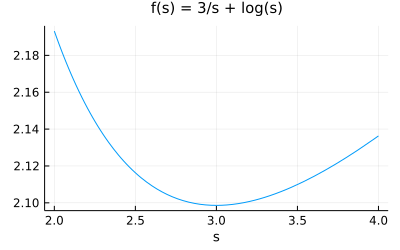

In [4]:
plot(s -> 3/s + log(s), 2, 4; label="",
    title="f(s) = 3/s + log(s)", xguide="s")

### 直交射影の公式

ベクトル $y$ の部分空間 $X\R^r$ への直交射影 $\yhat = X\betahat$ の具体的な形を求めよう.

ベクトル $y - \yhat = y - X\betahat$ は部分空間 $X\R^r$ と直交するので, 任意の $\gamma\in\R^r$ について

$$
0 = (X\gamma, y-X\betahat) =
(X\gamma)^T(y - X\betahat) =
\gamma^T X^T(y - X\betahat).
$$

ここで, $(\ ,\ )$ は通常の内積(成分の積の和)を表す. ベクトル $\gamma\in\R^r$ は任意なので, 

$$
X^T(y - X\betahat) = 0, \quad
\text{すなわち}\quad X^T X \betahat = X^T y.
$$

$X$ のランクが可能な最大値 $r$ になると仮定していたので, $X^T X$ は可逆になるのであった. ゆえに

$$
\betahat = (X^T X)^{-1} X^T y, \quad
\yhat = X(X^T X)^{-1} X^T y.
$$

これと,

$$
\sigmahat^2 = \frac{1}{n}\|y-X\betahat\|^2
$$

を合わせると, 尤度函数 $(\beta,\sigma^2)\mapsto p(y|X,\beta,\sigma^2)$ を最大化するパラメータ値を計算できる(コンピュータ上に実装できる).

これが正規分布で記述された統計モデルの最尤法の解である.

__注意:__ 以上の議論によって, 最小二乗法は本質的に直交射影を作る操作であることも分かる. このように内積に関する線形代数を理解していれば, その中に最小二乗法の理論も含まれていると考えることができる. 線形代数は普遍的に役に立つ道具である.

### βとσ²の不偏推定量

以下では, $\betahat$ と $\shat^2 = (n/(n-r))\sigmahat^2 = (1/(n-r))\|y - X\betahat\|^2$ がそれぞれ $\beta$ と $\sigma^2$ の不偏推定量になっていることを示す.

この節では, 前々節で記述した統計モデルに従う確率変数 $Y$ とは別に, ベクトル値確率変数 $y = [y_i]_{i=1}^n$ で次の条件を満たすものを使用する:

$$
y = X\beta + e, \quad E[e] = 0, \quad E[e e^T] = \sigma^2 I.
$$

このようなベクトル値確率変数 $y$ を使うことは, 正規分布で記述された統計モデルの設定を大幅に弱めることを意味している.  この節ではそのような状況を扱う.

上の条件中の $E[e e^T] = \sigma^2 I$ は $e$ の分散共分散行列であることに注意せよ.

(一般に $n$ 次元ベクトル値確率変数 $V=[V_i]_{i=1}^n$ について, $\mu = E[V]$ のとき, $n\times n$ の対称行列 $E[(V-\mu)(V-\mu)^T]$ を $V$ の分散共分散行列 (variance-covariance matrix) と呼ぶ.  その $(i,i)$ 成分は $V_i$ の分散になっており, $i\ne j$ に関する $(i,j)$ 成分は $V_i$ と $V_j$ の共分散になっている.)

$e=[e_i]_{i=1}^n$ と書くとき, $E[e e^T] = \sigma^2 I$ は

$$
E[e_i e_j] = \sigma^2 \delta_{ij}
$$

が成立することを意味している.  ここで $\delta_{ij}$ はKroneckerのデルタである. ($i=j$ のとき $\delta_{ij}=1$ で $i\ne j$ のとき $\delta_{ij}=0$.)

上の仮定の下で, $y$ の平均と分散共分散行列はそれぞれ次のようになる:

$$
E[y] = X\beta, \quad
E[(y-X\beta)(y-X\beta)^T] = E[e e^T] = \sigma^2 I.
$$

この設定における最小二乗法は次のように書ける:

$$
\betahat = (X^T X)^{-1} X^T y, \quad
\sigmahat^2 = \frac{1}{n}\|y-X\betahat\|^2.
$$

このとき,

$$
E[\betahat] = (X^T X)^{-1} X^T X\beta = \beta
$$

なので, $\betahat$ は $\beta$ の不偏推定量になっている.

以下では $\sigma^2$ の不偏推定量を構成しよう.

$$
\betahat - \beta = (X^T X)^{-1} X^T(X\beta + e) - \beta =
(X^T X)^{-1} X^T e
$$

より,

$$
(\betahat - \beta)(\betahat - \beta)^T=
(X^T X)^{-1} X^T e e^T X (X^T X)^{-1}
$$

なので, ベクトル値確率変数 $\betahat = (X^T X)^{-1} X^T y$ の分散共分散行列は次のようになる:

$$
E[(\betahat - \beta)(\betahat - \beta)^T] =
(X^T X)^{-1} X^T E[e e^T] X (X^T X)^{-1} = \sigma^2 (X^T X)^{-1}.
$$

2つ目の等号で $E[ee^T]=\sigma^2 I$ を使った.

$$
X\betahat - X\beta = X(\betahat - \beta), \quad
(X\betahat - X\beta)(X\betahat - X\beta)^T =
X(\betahat - \beta)(\betahat - \beta)^T X^T
$$

より, $X\betahat$ の分散共分散行列は次のように計算される:

$$
E[(X\betahat - X\beta)(X\betahat - X\beta)^T] =
X E[(\betahat - \beta)(\betahat - \beta)^T]X^T =
\sigma^2 X(X^T X)^{-1}X^T.
$$

2つ目の等号で, 上で示した $E[(\betahat - \beta)(\betahat - \beta)^T] = \sigma^2 (X^T X)^{-1}$ を使った.

$X(X^T X)^{-1}X^T$ は $\R^n$ からその部分空間 $X\R^r$ への直交射影を与える行列であった. (特に対称行列でかつ二乗しても不変であること $\left(X(X^T X)^{-1}X^T\right)^2=X(X^T X)^{-1}X^T$ にも注意せよ.)

$$
\begin{aligned}
&
y - X\betahat = y - X(X^T X)^{-1}X^T y = (I - X(X^T X)^{-1}X^T)y
\\ &
E[y - X\betahat] = E[y] - X(X^T X)^{-1}X^T E[y] =
X\beta - X(X^T X)^{-1}X^T X\beta = 0
\end{aligned}
$$

より, 残差 $y - X\betahat$ の分散共分散行列は次のように計算される:

$$
\begin{aligned}
E[(y - X\betahat)(y - X\betahat)^T] &=
(I - X(X^T X)^{-1}X^T)E[yy^T](I - X(X^T X)^{-1}X^T)^T
\\ &=
\sigma^2(I - X(X^T X)^{-1}X^T)(I - X(X^T X)^{-1}X^T)^T
\\ &=
\sigma^2(I - X(X^T X)^{-1}X^T).
\end{aligned}
$$

ここで, $E[yy^T]=\sigma^2 I$ および, $X(X^T X)^{-1}X^T$ が $\R^n$ から $X\R^r$ への直交射影を与える行列であったことから, $I - X(X^T X)^{-1}X^T$ が $\R^n$ から $X\R^r$ の直交補空間への射影を与える行列になり, 特に対称行列でかつ二乗しても不変になることを使った.

(一般に $P^T=P$, $P^2=P$ のとき, $(I-P)^T=I-P$ かつ $(I-P)^2=I-P$ となる.)

トレースの中で行列の順序を巡回的に回してもトレースの値は不変なので,

$$
\tr(X(X^T X)^{-1}X^T) = \tr((X^T X)^{-1}X^T X) = \tr(I_r) = r.
$$

ここで $I_r$ は $r$ 次の単位行列を表す.  この結果と

$$
\|y - X\betahat\|^2 = (y - X\betahat)^T(y - X\betahat) =
\tr\left((y - X\betahat)(y - X\betahat)^T\right)
$$

を使うと,

$$
\begin{aligned}
E[\|y - X\betahat\|^2] &=
\tr\left(E[(y - X\betahat)(y - X\betahat)^T]\right)
\\ &=
\sigma^2\tr(I - X(X^T X)^{-1}X^T) =
(n-r)\sigma^2.
\end{aligned}
$$

2つめの等号で上で示した $E[(y - X\betahat)(y - X\betahat)^T] = \sigma^2(I - X(X^T X)^{-1}X^T)$ を用い, 3つ目の等号で上で示した $\tr(X(X^T X)^{-1}X^T) = r$ を使った.

ゆえに,

$$
\shat^2 = \frac{1}{n-r} \|y - X\betahat\|^2 = \frac{n}{n-r}\sigmahat^2
$$

とおくと,

$$
E[\shat^2] = \sigma^2.
$$

すなわち, $\shat^2 = \|y - X\betahat\|^2/(n-r)$ は $\sigma^2$ の不偏推定量である.

$\sigma^2$ の不偏推定量を作るためには残差の二乗和 $\|y - X\betahat\|^2$ を $n$ ではなく, $n-r$ で割らなければいけない.

__注意:__ 特にこの節を見れば分かるように, 線形回帰の理解のために最も重要な基礎知識は線形代数である. 特に直交射影に関する線形代数が重要になる.

### 例: 平均の推定の場合

線形回帰は平均の推定を含む.

$r=1$ とし, $f_j(x_i)$ と $\beta_j$ のインデックス $j$ として $1$ ではなく $0$ を使うことにし, 

$$
f_0(x_i)=1, \quad
\beta_0 = \mu, \quad
\betahat_0 = \muhat
$$

の場合について考える. このとき, デザイン行列 $X$ は $n$ 次元縦ベクトルになり,

$$
X = \begin{bmatrix} 1 \\ 1 \\ \vdots \\ 1 \\ \end{bmatrix}, \quad
X\beta = \begin{bmatrix} \mu \\ \mu \\ \vdots \\ \mu \\ \end{bmatrix}.
$$

ゆえに, $X^T X = n$, $X^T y=\sum_{i=1}^n y_i$ となるので, 

$$
\muhat = (X^T X)^{-1}X^T y = \frac{1}{n}\sum_{i=1}^n y_i =: \ybar.
$$

さらに, $y - X\betahat = [y_i - \muhat]_{i=1}^n = [y_i - \ybar]_{i=1}^n$ より,

$$
\sigmahat^2 = \frac{1}{n}\|y-X\betahat\| = \frac{1}{n}\sum_{i=1}^n (y_i - \ybar)^2.
$$

これは, $\sigma^2$ を, 不偏推定量になるように $n-1$ で割らずに, $n$ で割って作った場合の標本分散になっている. 

前節で示したように $\sigma^2$ の不偏推定量 $\shat^2$ は $n-r=n-1$ で割ることによって得られる:

$$
\shat^2 = \frac{1}{n-1}\|y-X\betahat\| = \frac{1}{n-1}\sum_{i=1}^n (y_i - \ybar)^2.
$$

この結果は標本の不偏分散の話の線形回帰に関する結果を使った再現になっている.

### 例: 単回帰の場合

$r=2$ とし, $f_j(x_i)$ と $\beta_j$ のインデックス $j$ として $1,2$ ではなく $0,1$ を使うことにし, 

$$
f_0(x_i)=1, \quad
f_1(x_i)=x_i
$$

の場合を考える. さらに, 以下のようにおく:

$$
\begin{aligned}
&
\xbar = \frac{1}{n}\sum_{i=1}^n x_i, \quad
\ybar = \frac{1}{n}\sum_{i=1}^n y_i, 
\\ &
\overline{x^2}=\frac{1}{n}\sum_{i=1}^n x_i^2, \quad
\overline{y^2}=\frac{1}{n}\sum_{i=1}^n y_i^2, \quad
\overline{xy}=\frac{1}{n}\sum_{i=1}^n x_i y_i.
\end{aligned}
$$

このとき, $x_i$ 達と $y_i$ 達の不偏補正をしていない標本分散と標本共分散はそれぞれ次のように書ける:

$$
\begin{aligned}
&
\sigmahat_x^2 :=
\frac{1}{n}\sum_{i=1}^n(x_i - \xbar)^2 =
\overline{x^2} - \xbar^2,
\\ &
\sigmahat_y^2 :=
\frac{1}{n}\sum_{i=1}^n(y_i - \ybar)^2 =
\overline{y^2} - \ybar^2,
\\ &
\sigmahat_{xy} := 
\frac{1}{n}\sum_{i=1}^n(x_i - \xbar)(y_i - \ybar) =
\overline{xy} - \xbar\ybar.
\end{aligned}
\tag{$*$}
$$

このとき, デザイン行列 $X$ については, 以下が成立していることをちょっとした計算で確認できる(自分で確認してみよ):

$$
\begin{alignedat}{2}
&
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots\\
1 & x_n \\
\end{bmatrix}, \quad
& &
X^T X = n
\begin{bmatrix}
1 & \xbar \\
\xbar & \overline{x^2} \\
\end{bmatrix},
\\ &
X^T y = n
\begin{bmatrix}
\ybar \\
\overline{xy} \\
\end{bmatrix}, \quad
& &
(X^T X)^{-1} =
\frac{1}{n(\overline{x^2}-\xbar^2)}
\begin{bmatrix}
\overline{x^2} & -\xbar \\ -
\xbar & 1 \\
\end{bmatrix}.
\end{alignedat}
$$

ゆえに,

$$
\overline{x^2}\ybar - \xbar\overline{xy} =
\overline{x^2}\ybar - \xbar^2\ybar + \xbar^2\ybar - \xbar\overline{xy} =
\sigmahat_x^2 \ybar - \sigmahat_{xy}\xbar
$$

が成立していることに注意すれば, 

$$
\begin{bmatrix} \betahat_0 \\ \betahat_1\\ \end{bmatrix} =
\betahat =
(X^T X)^{-1}X^T y =
\begin{bmatrix}
\ybar - (\sigmahat_{xy}/\sigmahat_x^2)\xbar \\
\sigmahat_{xy}/\sigmahat_x^2\\
\end{bmatrix}.
$$

すなわち, 次の回帰直線の公式が得られた:

$$
\betahat_0 + \betahat_1 x_* =
\ybar + \frac{\sigmahat_{xy}}{\sigmahat_x^2}(x_* - \xbar).
$$

$\sigmahat^2$ の公式も求めよう. 

$$
y - X\betahat = (I - X(X^T X)^{-1}X^T)y
$$

より, 

$$
\begin{aligned}
\|y - X\betahat\|^2 &=
y^T(I - X(X^T X)^{-1}X^T)^T(I - X(X^T X)^{-1}X^T)y
\\ &=
y^T(I - X(X^T X)^{-1}X^T)y
\\ &=
y^T y - (X^T y)^T (X^T X)^{-1}X^T y.
\end{aligned}
$$

そして,

$$
\begin{aligned}
&
y^T y = n\overline{y^2}, 
\\ &
(X^T y)^T (X^T X)^{-1}X^T y =
\frac{n}{\sigmahat_x^2}
\left(\overline{x^2}-2\xbar\ybar\overline{xy} + \overline{xy}^2\right)
\end{aligned}
$$

および上の($*$)を使って整理すると,

$$
\sigmahat^2 = \frac{1}{n}\|y - X\betahat\|^2 =
\frac{\sigmahat_x^2 \sigmahat_y^2 - \sigmahat_{xy}^2}{\sigmahat_x^2}.
$$

前々節の結果より, $\sigma^2$ の不偏推定量 $\shat^2$ は $n$ ではなく, $n-r=n-2$ で割ることによって次のようにして得られる:

$$
\shat^2 = \frac{1}{n-2}\|y - X\betahat\|^2 =
\frac{n}{n-2}\frac{\sigmahat_x^2 \sigmahat_y^2 - \sigmahat_{xy}^2}{\sigmahat_x^2}.
$$

$x_i$ 達と $y_i$ 達の不偏分散と不偏共分散を

$$
s_x^2 := \frac{n}{n-1}\sigmahat_x^2, \quad
s_y^2 := \frac{n}{n-1}\sigmahat_y^2, \quad
s_{xy} := \frac{n}{n-1}\sigmahat_{xy}
$$

と書くと, 

$$
\begin{aligned}
&
\beta_0 = \ybar - \frac{\sigmahat_{xy}}{\sigmahat_x^2}\xbar =
\ybar - \frac{s_{xy}}{s_x^2}\xbar,
\quad
\beta_1 = \frac{\sigmahat_{xy}}{\sigmahat_x^2} =
\frac{s_{xy}}{s_x^2},
\\ &
\sigmahat^2 =
\frac{n-1}{n} \frac{s_x^2 s_y^2 - s_{xy}^2}{s_x^2},
\quad
\shat^2 =
\frac{n-1}{n-2} \frac{s_x^2 s_y^2 - s_{xy}^2}{s_x^2}.
\end{aligned}
$$

以上の公式は

* [「標本分布について」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/04%20Distribution%20of%20samples.ipynb)

の「最小二乗法による線形回帰」の節で得た公式の再現になっている.

### Julia言語による回帰直線の計算の最も簡単な例

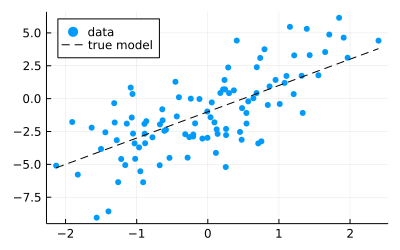

In [5]:
# パッケージの読み込みなど
using Distributions
using StatsPlots
using Random
Random.seed!(4649373)

# テストデータのランダム生成
n = 100
x = rand(Normal(0, 1), n);
e = rand(Normal(0, 1), n);
β = [-1, 2]
σ = 2
y = @. β[1] + β[2]*x + σ*e;
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(xstar -> β[1] + β[2]*xstar; label="true model", c=:black, ls=:dash)

In [6]:
# デザイン行列
X = x .^ (0:1)';

# デザイン行列の上から5行分を表示
X[1:5, :]

5×2 Matrix{Float64}:
 1.0   0.843695
 1.0   0.286651
 1.0  -0.117361
 1.0   1.43215
 1.0  -1.39703

In [7]:
# 線形回帰
# 以下は β̂ = X'X\X'y もしくは β̂ = inv(X'*X)*X'*y と同値
β̂ = X \ y

2-element Vector{Float64}:
 -1.0404163851842536
  2.235682111246987

In [8]:
inv(X'*X)*X'*y

2-element Vector{Float64}:
 -1.0404163851842536
  2.235682111246987

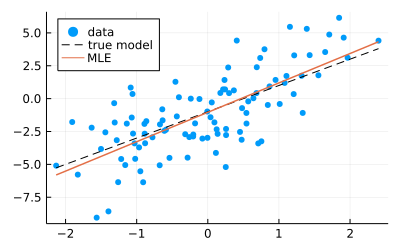

In [9]:
# 結果をプロット
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(xstar -> β[1] + β[2]*xstar; label="true model", c=:black, ls=:dash)
plot!(xstar -> β̂[1] + β̂[2]*xstar; label="MLE", c=2, lw=1.5)

MLEは最尤推定(さいゆうほう, maximum likelihood estimate)の略である.

[Julia言語](https://julialang.org/)([download](https://julialang.org/downloads/)) の current stable release をダウンロードして, インストールして, 実行して,

```
julia> 
```

で `]` を押した後に,

```
pkg> add Distributions, StatsPlots
```

を実行し,

```
pkg> 
```

でバックスペースキーを押して,

```
julia> 
```

の状態に上のコードを貼り付ければ上と同じことをできるはずである.

Julia言語では最小二乗法による回帰は `β̂ = X \ y` だけで可能である.

`X'` は `X` の転置(の複素共役)を意味する.

上のコードをコピー＆ペーストすることによって以下のスクリーンショットのように計算して, グラフを作ることができる.

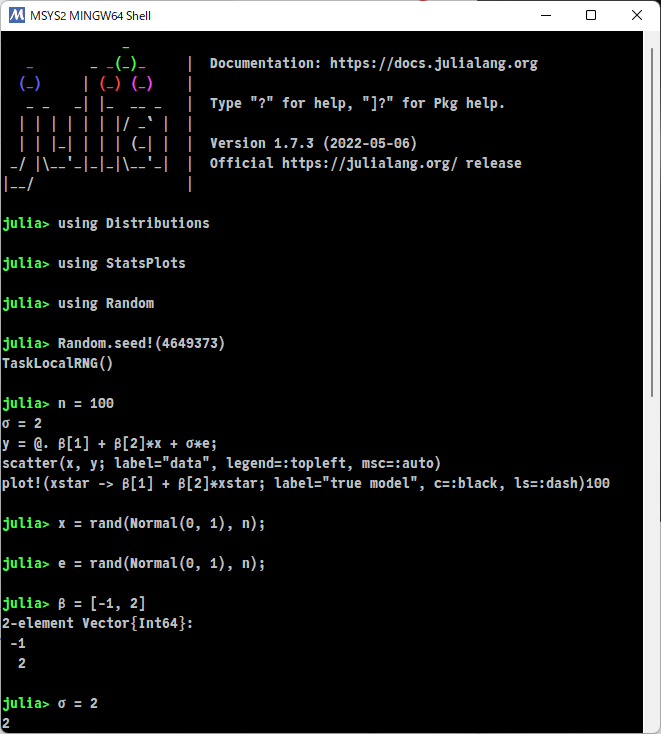

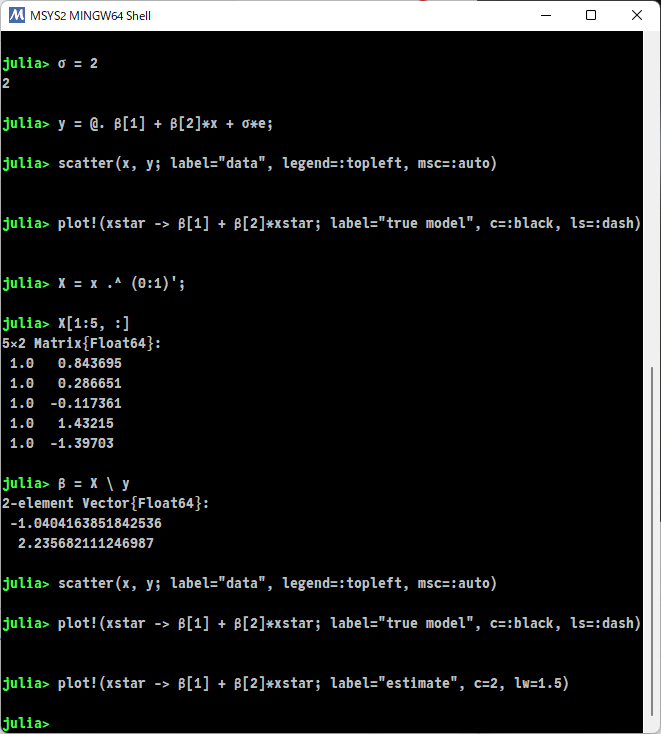

`β̂ = X \ y` の部分の `β̂` が潰れて `β` と表示されている点は気にしないことにした.

できあがったグラフは以下のように表示されている.

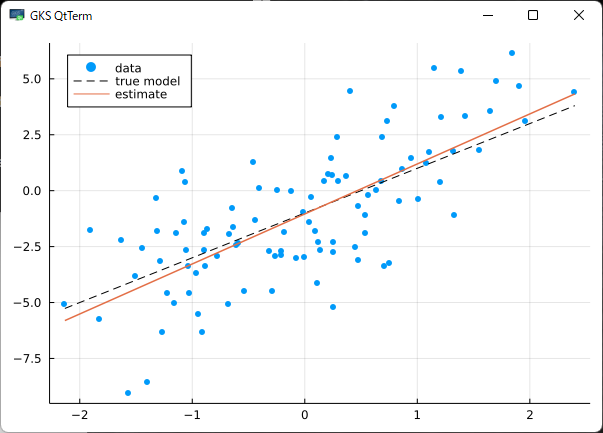

ここまで無事にたどり付けなかった場合には, エラーメッセージをインターネットで検索すれば解決法が見つかることが多い.

### 多変量正規分布の定義

$\mu\in\R^n$ と固有値がすべて正の $n$ 次の実対称行列 $\Sigma$ に対して, 多変量正規分布

$$
\MvNormal(\mu, \Sigma)
$$

の確率密度函数を次のように定める:

$$
p(y|\mu, \Sigma) =
\frac{1}{\det(2\pi\Sigma)^{1/2}}
\exp\left(-\frac{1}{2}(y-\mu)^T\Sigma^{-1}(y-\mu)\right)
\quad (y\in\R^n).
$$

__例:__ $\mu=(m,m,\ldots,m)$, $\Sigma = \sigma^2 I$ ($I$ は $n$ 次の単位行列で $\sigma^2>0$)のとき,

$$
p(y|\mu, \Sigma) =
\frac{1}{(2\pi\sigma^2)^{n/2}}
\exp\left(-\frac{1}{2\sigma^2}\sum_{i=1}^n (y_i - m)^2\right).
$$

これは正規分布の標本分布 $\Normal(m,\sigma^2)^n$ の密度函数に等しい.

### 問題: 多変量正規分布とχ²分布の関係

前節の $n$ 変量正規分布 $\MvNormal(\mu, \Sigma)$ を考える:

$$
p(y|\mu, \Sigma) =
\frac{1}{\det(2\pi\Sigma)^{1/2}}
\exp\left(-\frac{1}{2}(y-\mu)^T\Sigma^{-1}(y-\mu)\right)
\quad (y\in\R^n).
$$

この分布に従う $n$ 次元ベクトル値確率変数を $Y$ と書き, 確率変数 $\chi^2$ を

$$
\chi^2 = (Y-\mu)^T\Sigma^{-1}(Y-\mu)
$$

と定めると, $\chi^2$ は自由度 $n$ のχ²分布に従うことを示せ.

__解答例:__ 固有値達 $\sigma_i^2$ がすべて正の実対称行列 $\Sigma$ はある直交行列 $U$ によって次のように対角化できる:

$$
\Sigma = UD^2U^{-1} = UD^2U^T, \quad
D = \diag(\sigma_1,\ldots,\sigma_n), \quad \sigma_i > 0.
$$

このとき,

$$
\det(2\pi\Sigma)^{1/2} = \prod_{i=1}^n(2\pi\sigma_i^2)^{1/2} =
(2\pi)^{n/2}\sigma_1\cdots\sigma_n.
$$

さらに, $x = [x_i]_{i=1}^n = D^{-1}U^T(y-\mu)$ とおくと, $\Sigma^{-1}=UD^{-2}U^T$ より

$$
(y-\mu)^T\Sigma^{-1}(y-\mu) = x^T x
$$

となり, 直交行列による変換が体積を保つことより, 

$$
|dy_1\cdots dy_n| = \sigma_1\cdots\sigma_n\, |dx_1\cdots dx_n|
$$

となるので, 

$$
\begin{aligned}
p(y|\mu,\Sigma)\,|dy_1\cdots dy_n| &=
\frac{1}{(2\pi)^{n/2}\sigma_1\cdots\sigma_n}
\exp\left(-\frac{1}{2}(y-\mu)^T\Sigma^{-1}(y-\mu)\right)\,|dy_1\cdots dy_n|
\\ &=
\frac{1}{(2\pi)^{n/2}}
\exp\left(-\frac{1}{2}x^T x\right)\,|dx_1\cdots dx_n|
\\ &=
\frac{1}{(2\pi)^{n/2}}
\exp\left(-\frac{1}{2}\sum_{i=1}^n x_i^2\right)\,|dx_1\cdots dx_n|.
\end{aligned}
$$

ゆえに, 変数 $x$ に対応するベクトル値確率変数を $X=[X_i]_{i=1}^n$ と書くと, $X_1,\ldots,X_n$ はそれぞれが標準正規分布に従う独立な確率変数達になり, 

$$
\chi^2 = (Y-\mu)^T\Sigma^{-1}(Y-\mu) = X^T X = \sum_{i=1}^n X_i^2
$$

となるので, $\chi^2$ は自由度 $n$ のχ²分布に従う. 

__解答終__

### 真の回帰函数と推定された回帰函数

「βとσ²の不偏推定量」の節の仮定の下で, $x_*\in\R$ の函数

$$
f(x_*)^T\beta = \sum_{j=1}^r \beta_j f_j(x_*)
$$

を __真の回帰函数__ と呼び, 

$$
f(x_*)^T\betahat = \sum_{j=1}^r \betahat_j f_j(x_*)
$$

を __推定された回帰函数__ と呼ぶことにする.

__注意:__ 真の回帰函数の「真の」の意味は「現実における真の」という意味ではない. 仮想的なデータを生成するために用いたモデルのパラメータの設定を意味するに過ぎない.

### (真の)回帰直線の値の信頼区間 (標準正規分布版)

この節では, 「βとσ²の不偏推定量」の節で仮定した条件に加えて, ベクトル値 $\betahat = (X^T X)^{-1}X^T y$ が近似的に多変量正規分布に従い, $\shat^2 \approx \sigma^2$ という近似が成立していると仮定する.

このとき, 「βとσ²の不偏推定量」の節で示した結果

$$
E[\betahat] = \beta, \quad
E[(\betahat - \beta)(\betahat - \beta)^T] = \sigma^2 (X^T X)^{-1}
$$

より, 次の近似が成立している:

$$
\betahat \sim \MvNormal(\beta,\; \shat^2 (X^T X)^{-1}), \ \text{approximately}.
$$

ゆえに, $x_*\in\R$ について,

$$
f(x_*)^T\betahat
\sim \Normal\left(f(x_*)^T\beta,\; \SEhat_{f(x_*)^T\betahat}\right),
\ \text{approximately}.
$$

ここで,

$$
\SEhat_{f(x_*)^T\betahat} = \shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}
$$

これより, 真の回帰函数の $x_*\in\R$ の値 $f(x_*)^T\beta$ に関する仮説 $f(x_*)^T\beta = f(x_*)^T\beta_0$ のP値と $f(x_*)^T\beta$ の値の信頼区間を定義できる.

__(真の)回帰函数の $x_*$ における値に関する仮説 $f(x_*)^T\beta = f(x_*)^T\beta_0$ のP値の定義:__ $t(x_*, \beta_0)$ を

$$
t(x_*, \beta_0) =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\SEhat_{f(x_*)^T\betahat}} =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}}
$$

と定め, P値を次のように定める:

$$
\pvalue_{\Normal}(y|X, f(x_*)^T\beta=f(x_*)\beta_0) =
2(1 - \cdf(\Normal(0,1), |t(x_*, \beta_0)|)).
$$

__(真の)回帰函数の値 $f(x_*)^T\beta$ に関する信頼度 $1-\alpha$ の信頼区間の定義:__ $z_{\alpha/2}$ を

$$
z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2).
$$

と定め, 信頼区間を次のように定める:

$$
\confint^{f(x_*)^T\beta}_{\Normal}(y|X) = \left[
f(x_*)^T\betahat - z_{\alpha/2}\SEhat_{f(x_*)^T\betahat},\;
f(x_*)^T\betahat + z_{\alpha/2}\SEhat_{f(x_*)^T\betahat}
\right].
$$

__注意:__ 「真の」は「現実における真の」を意味しない. 単に仮想的なデータを生成するモデルのパラメータの設定を意味するに過ぎない.

###  (真の)回帰直線の値の信頼区間 (t分布版)

前節の標準正規分布を使って定義されたP値と信頼区間の $t$ 分布を使った補正を構成しよう.

そのために, 前節までに仮定していた条件よりもさらに強い次の条件を仮定する:

$$
e = [e_i]_{i=1}^n \sim \Normal(0,\sigma)^n = \MvNormal(0, \sigma^2 I).
$$

これは正規分布で記述されていた統計モデル内の設定に戻ったことを意味している.

このとき, 

$$
\betahat \sim \MvNormal(\beta,\; \sigma^2 (X^T X)^{-1}).
$$

ゆえに, $x_*\in\R$ について,

$$
f(x_*)^T\betahat
\sim \Normal\left(f(x_*)^T\beta,\; \SE_{f(x_*)^T\betahat}\right).
$$

ここで,

$$
\SE_{f(x_*)^T\betahat} = \sigma\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}.
$$

さらに, 

$$
y - X\betahat = (X\beta + e) - X(X^T X)^{-1}X^T(X\beta + e) =
(I - X(X^T X)^{-1}X^T)e
$$

が部分空間 $X\R^r$ の直交補空間($n-r$ 次元になる)へのベクトル値確率変数 $e \sim \MvNormal(0, \sigma^2 I)$ の直交射影であることから, 

$$
\frac{(n-r)\shat^2}{\sigma^2} = \|y - X\betahat\|^2 \sim \Chisq(n-r)
$$

となることを示せる. (「多変量正規分布とχ²分布の関係」を使えば容易に示される.)

$\yhat = X\betahat$ と $y-\yhat = y-X\betahat$ が独立であることより(その独立性はそれらが直交することから導かれる), $f(x_*)^T\betahat$ と $(n-r)\shat^2/\sigma^2 = \|y - X\betahat\|^2$ が独立になることも導かれるので, 一般に独立な確率変数達 $Z\sim\Normal(0,1)$ と $Y\sim\Chisq(\nu)$ について,

$$
\frac{Z}{\sqrt{Y/\nu}} \sim \TDist(\nu)
$$

が成立することより,

$$
t(x_*, \beta) =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta}
{\SEhat_{f(x_*)^T\betahat}} =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta}
{\shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}}
\sim \TDist(n-r).
$$

これを使うと $t$ 分布を使って補正したP値と信頼区間を以下のように定義できる:

__(真の)回帰函数の値に関する仮説 $f(x_*)^T\beta = f(x_*)^T\beta_0$ のP値の定義:__ $t(x_*, \beta_0)$ を

$$
t(x_*, \beta_0) =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\SEhat_{f(x_*)^T\betahat}} =
\frac
{f(x_*)^T\betahat - f(x_*)^T\beta_0}
{\shat\sqrt{f(x_*)^T(X^T X)^{-1}f(x_*)}}
$$

と定め, P値を次のように定める:

$$
\pvalue_{\TDist}(y|X, f(x_*)^T\beta=f(x_*)\beta_0) =
2(1 - \cdf(\TDist(n-r), |t(x_*, \beta_0)|)).
$$

__(真の)回帰函数の値 $f(x_*)^T\beta$ の信頼度 $1-\alpha$ の信頼区間の定義:__ $t_{\nu, \alpha/2}$ を

$$
t_{\nu, \alpha/2} = \quantile(\TDist(\nu), 1-\alpha/2).
$$

と定め, 信頼区間を次のように定める:

$$
\confint^{f(x_*)^T\beta}_{\TDist}(y|X) = \left[
f(x_*)^T\betahat - t_{n-r, \alpha/2}\SEhat_{f(x_*)^T\betahat},\;
f(x_*)^T\betahat + t_{n-r, \alpha/2}\SEhat_{f(x_*)^T\betahat}
\right].
$$

__注意:__ 「真の」は「現実における真の」を意味しない. 単に仮想的なデータを生成するモデルのパラメータの設定を意味するに過ぎない.

### 予測区間

前節の仮定 $e\sim \Normal(0,\sigma)^n$ に加えて、さらに

$$
\begin{bmatrix}e \\ e_*\\ \end{bmatrix} \sim \Normal(0,\sigma)^{n+1}
$$

と仮定し, 任意に $x_*\in\R$ を取り,

$$
y_* = f(x_*)^T\beta + e_*
$$

とおく. このとき,

$$
y_* - f(x_*)^T\betahat = e_* + f(x_*)^T\beta - f(x_*)^T\betahat
\sim \Normal\left(0, \SE_{y_* - f(x_*)^T\betahat}\right).
$$

ここで, 

$$
\begin{aligned}
\left(\SE_{y_* - f(x_*)^T\betahat}\right)^2 &=
(\text{$e_*$ の分散}) + (\text{$f(x_*)^T\beta - f(x_*)^T\betahat$ の分散})
\\ &=
\sigma^2 + \sigma^2 f(x_*)^T(X^T X)^{-1}f(x_*).
\end{aligned}
$$

すなわち,

$$
\SE_{y_* - f(x_*)^T\betahat} = 
\sigma\sqrt{1 + f(x_*)^T(X^T X)^{-1}f(x_*)}.
$$

前節の $\SE_{f(x_*)^T\betahat}$ との違いは平方根の中に $e_*$ の分散から出て来た項の $1$ が含まれていることである. 

これより,

$$
\SEhat_{y_* - f(x_*)^T\betahat} = 
\shat\sqrt{1 + f(x_*)^T(X^T X)^{-1}f(x_*)}.
$$

とおくと, 前節と同様にして,

$$
\frac{y_* - f(x_*)^T\betahat}{\SEhat_{y_* - f(x_*)^T\betahat}}
\sim \TDist(n-r).
$$

これを使って, $y_*$ の __予測区間__ (prediction interval)を次のように定義できる:

$$
\predint^{y_*}_{\TDist}(y|X, x_*) = \left[
f(x_*)^T\betahat - t_{n-r, \alpha/2}\SEhat_{y_* - f(x_*)^T\betahat},\;
f(x_*)^T\betahat + t_{n-r, \alpha/2}\SEhat_{y_* - f(x_*)^T\betahat}
\right].
$$

前節の $\SEhat_{f(x_*)^T\betahat}$ と $\SEhat_{y_* - f(x_*)^T\betahat}$ の違いは, 後者の定義式の平方根中に $1$ が含まれていることである. だから, 予測区間は信頼区間よりも必ず広くなる.  そうなる理由は $y_*$ の定義を見れば明らかで, $y_*$ の定義にはノイズの項 $e_*$ が含まれている.  その分だけ区間の幅が広くなる.

### 「回帰函数の値の信頼区間」と「予測区間」の違い

回帰函数の値の信頼区間は, 残差を含まない回帰函数の値(最も簡単な場合には回帰直線上の値)の信頼区間であり, 残差の分の確率的揺らぎを持つデータの数値の予測には使えない.

予測区間は, 残差による確率的揺らぎの大きさを含んでおり, データの数値の予測に使える.

実用的にはこの節より前の部分にある面倒な計算を理解していなくても, この違いだけを理解していれば足りることが多いように思われる.

しかし, 言葉での説明では分かり難いの次の節の計算例の視覚化を参照せよ.

## 線形回帰の計算例

以下において CI, PI はそれぞれ

* 真の回帰函数の値の信頼区間 (confidence interval)
* データの値(＝真の回帰函数＋ノイズ)の予測区間 (prediction interval)

の略である.

### 信頼区間と予測区間のプロット

In [10]:
function plot_linreg_confint_predint(x, y, F...; α = 0.05, kwargs...)
    n = length(x)
    r = length(F)
    X = [fⱼ(xᵢ) for xᵢ in x, fⱼ in F] # design matrix
    β̂ = X \ y # equivalent to β̂ = X*(X'X)\X'y
    ŷ = X * β̂ # orthogonal projection of y onto Xℝʳ
    ŝ = norm(y - ŷ)/√(n - r)  # ŝ² is the unbiased estimator of σ²
    @show n r α
    m = @show quantile(TDist(n-r), 1-α/2)
    @show β̂ ŝ
    
    f̂(xstar) = sum(β̂ⱼ * fⱼ(xstar) for (β̂ⱼ, fⱼ) in zip(β̂, F))
    f(xstar) = [fⱼ(xstar) for fⱼ in F]
    invXX = inv(X'X)
    g(xstar) = ŝ * √(    f(xstar)' * invXX * f(xstar)) # for CI
    h(xstar) = ŝ * √(1 + f(xstar)' * invXX * f(xstar)) # for PI

    a, b = extrema(x)
    a, b = a - 0.05(b-a), b + 0.05(b-a)
    scatter(x, y; label="data", msc=:auto, c=1)
    plot!(xstar -> f̂(xstar), a, b; label="", c=:red)
    plot!(xstar -> f̂(xstar) - m*g(xstar), a, b;
        label="$(100(1-α))% CI", c=2, ls=:dash)
    plot!(xstar -> f̂(xstar) + m*g(xstar), a, b;
        label="", c=2, ls=:dash)
    plot!(xstar -> f̂(xstar) - m*h(xstar), a, b;
        label="$(100(1-α))% PI", c=3, ls=:dashdot)
    plot!(xstar -> f̂(xstar) + m*h(xstar), a, b;
        label="", c=3, ls=:dashdot)
    plot!(size=(520, 250), legend=:outertopright)
    plot!(; kwargs...)
end

plot_linreg_confint_predint (generic function with 1 method)

#### 信頼区間と予測区間のテストプロット

n = 21
r = 2
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.093024054408309
β̂ = [-2.4436068097922625, 1.2636653169073329]
ŝ = 6.1883934314865146


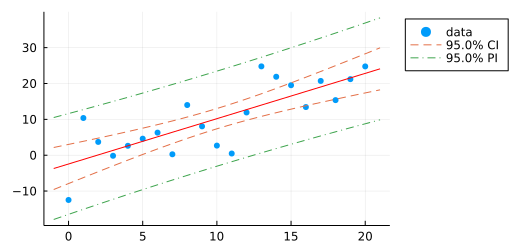

In [11]:
Random.seed!(464937345105963)
x = 0:20
e = rand(Normal(0, 5), length(x))
y = @. 1 + x + e
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:1)...)

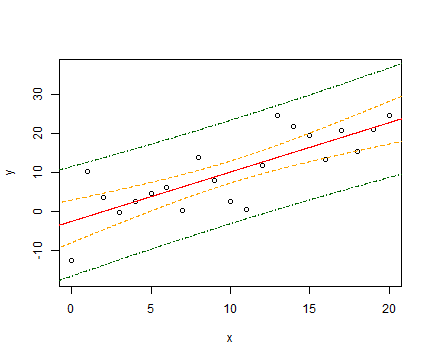

RObject{VecSxp}

Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
     -2.444        1.264  



In [12]:
@rput x y
reg = R"""reg = lm(y ~ x)"""
R"""
xstars = data.frame(x = seq(-1, 21, 0.02))
conf.interval = predict(reg, newdata = xstars, interval = 'confidence', level = 0.95)
pred.interval = predict(reg, newdata = xstars, interval = 'prediction', level = 0.95)

plot(x, y, ylim = c(-17, 37))
lines(xstars$x, conf.interval[, 1], col = 'red')
lines(xstars$x, conf.interval[, 2], col = 'orange', lty=2)
lines(xstars$x, conf.interval[, 3], col = 'orange', lty=2)
lines(xstars$x, pred.interval[, 2], col = 'darkgreen', lty=4)
lines(xstars$x, pred.interval[, 3], col = 'darkgreen', lty=4)
"""
reg

以上によって, このノートのコードの結果とRによる計算結果のプロットは一致していることがわかった.

#### 回帰直線の信頼区間と予測区間

β = [-1, 2]


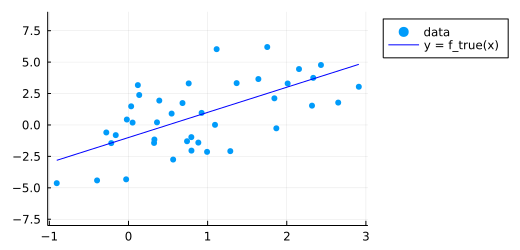

In [13]:
Random.seed!(4649373)
n = 40
β₀, β₁ = β = [-1, 2]
@show β
f_true(x) = β₀ + β₁*x
x = rand(Normal(1, 1), n)
y = f_true.(x) + rand(Normal(0, 2), n)

scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(f_true, extrema(x)...; label="y = f_true(x)", c=:blue)
plot!(size=(520, 250), legend=:outertopright)
plot!(ylim=(-8, 9))

β = [-1, 2]
n = 40
r = 1
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0226909200367604
β̂ = [0.7224983356350365]
ŝ = 2.745840198360994


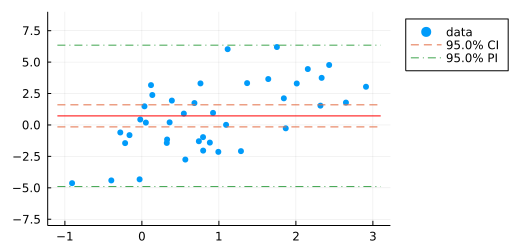

In [14]:
# 0次函数による回帰函数の推定
# 実質的に xᵢ 達を無視して, yᵢ 達だけを使った平均の推定になる.

@show β
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:0)...)
plot!(ylim=(-8, 9))

β = [-1, 2]
n = 40
r = 2
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0243941639119694
β̂ = [-0.8651568001715194, 1.7549089886753282]
ŝ = 2.222022308287274


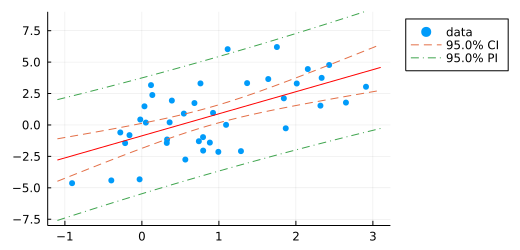

In [15]:
# 回帰直線の推定

@show β
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:1)...)
plot!(ylim=(-8, 9))

#### 多項式回帰の信頼区間と予測区間 (オーバーフィッティングの例)

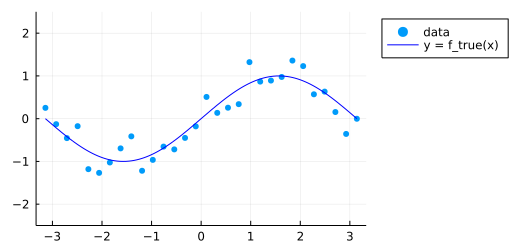

In [16]:
Random.seed!(4649373)

n = 30
f_true(x) = sin(x)
x = range(-π, π, n)
y = f_true.(x) + rand(Normal(0, 0.3), n)
scatter(x, y; label="data", legend=:topleft, msc=:auto)
plot!(f_true, extrema(x)...; label="y = f_true(x)", c=:blue)
plot!(size=(520, 250), legend=:outertopright)
plot!(ylim=(-2.5, 2.5))

n = 30
r = 1
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0452296421327034
β̂ = [-0.012921569974331694]
ŝ = 0.7781229227974805


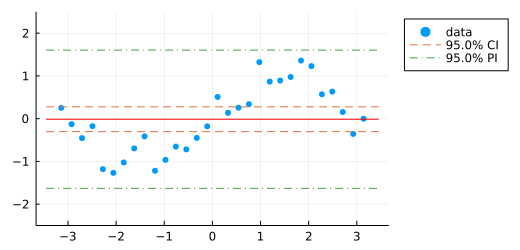

In [17]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:0)...)
plot!(ylim=(-2.5, 2.5))

n = 30
r = 2
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0484071417952445
β̂ = [-0.012921569974331675, 0.25146544548096655]
ŝ = 0.6235650870768796


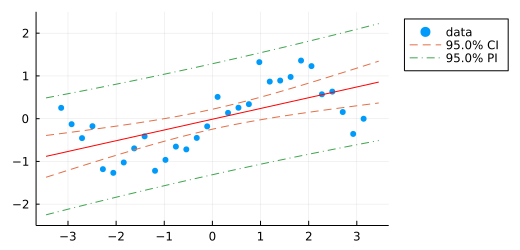

In [18]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:1)...)
plot!(ylim=(-2.5, 2.5))

n = 30
r = 4
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0555294386428726
β̂ = [-0.004868037850388715, 0.9055404522516881, -0.0022900460140340695, -0.10348024677024828]
ŝ = 0.3018043730527076


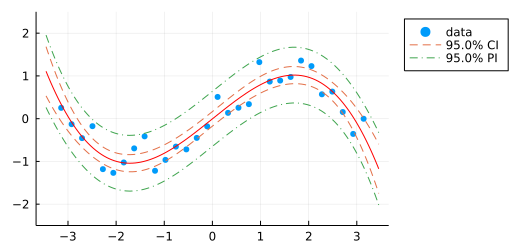

In [19]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:3)...)
plot!(ylim=(-2.5, 2.5))

n = 30
r = 6
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0638985616280254
β̂ = [-0.026428141042331734, 1.0071582696511716, 0.0182525867063003, -0.14879998365691066, -0.0022800938849420445, 0.003892016571707278]
ŝ = 0.3078837919499401


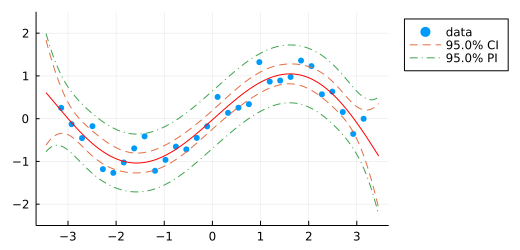

In [20]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:5)...)
plot!(ylim=(-2.5, 2.5))

n = 30
r = 20
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.228138851986274
β̂ = [0.14247028140681808, 1.2914469265448518, -2.862708649041329, -3.1780625037772205, 7.518055380487802, 7.790792095545583, -8.165629013870868, -8.17395305360277, 4.666047726772347, 4.345360937853182, -1.5269201557827485, -1.3012484041405847, 0.2944652989355421, 0.22929508226073686, -0.03296579977722806, -0.023587239919145065, 0.001976582640073381, 0.0013103573390256058, -4.899517106916385e-5, -3.036313618793969e-5]
ŝ = 0.24567191751997788


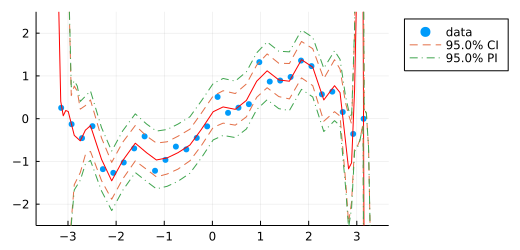

In [21]:
plot_linreg_confint_predint(x, y, (x -> x^k for k in 0:19)...)
plot!(ylim=(-2.5, 2.5))

サンプルサイズ $n=30$ のときに, $r-1=19$ 次の多項式函数で推定された回帰函数はぐちゃぐちゃになってしまっており, 左右の端の方で信頼区間と予測区間の幅が爆発している.

これは __過剰適合__ (オーバーフィッティング, overfitting)の典型例になっている.

パラメータが多いモデルで推定を行うと過剰適合が起こり易い.

この問題に対処するための方法に, パラメータの動き方に制限を付ける正則化やモデルの適切な複雑さを知るための赤池情報量規準 (AIC)やベイズ統計でのWAICなどがある. 以下はそれらの検索のためのリンクである.

* [正則化 回帰](https://www.google.com/search?q=%E6%AD%A3%E5%89%87%E5%8C%96+%E5%9B%9E%E5%B8%B0%E3%83%A2%E3%83%87%E3%83%AB)
* [赤池情報量規準](https://www.google.com/search?q=%E8%B5%A4%E6%B1%A0%E6%83%85%E5%A0%B1%E9%87%8F%E8%A6%8F%E6%BA%96)
* [WAIC ベイズ](https://www.google.com/search?q=WAIC+%E3%83%99%E3%82%A4%E3%82%BA)

### 信頼区間と予測区間に対応するP値函数のプロット

In [22]:
function plot_linreg_pvalue_functions(x, y, F...;
        α = 0.05, xstars=nothing, ystars=nothing, kwargs...)
    n = length(x)
    r = length(F)
    X = [fⱼ(xᵢ) for xᵢ in x, fⱼ in F] # design matrix
    β̂ = X \ y # equivalent to β̂ = X*(X'X)\X'y
    ŷ = X * β̂ # orthogonal projection of y onto Xℝʳ
    ŝ = norm(y - ŷ)/√(n - r) # ŝ² is the unbiased estimator of σ²
    @show n r α
    m = @show quantile(TDist(n - r), 1-α/2)
    @show β̂ ŝ
    
    f̂(xstar) = sum(β̂ⱼ * fⱼ(xstar) for (β̂ⱼ, fⱼ) in zip(β̂, F))
    f(xstar) = [fⱼ(xstar) for fⱼ in F]
    invXX = inv(X'X)
    g(xstar) = ŝ * √(    f(xstar)' * invXX * f(xstar)) # for CI
    h(xstar) = ŝ * √(1 + f(xstar)' * invXX * f(xstar)) # for PI
    tdist = TDist(n - r)
    G(xstar, ystar) = 2ccdf(tdist, abs(ystar - f̂(xstar))/g(xstar)) # pval of CI
    H(xstar, ystar) = 2ccdf(tdist, abs(ystar - f̂(xstar))/h(xstar)) # pval of PI

    if isnothing(xstars)
        a, b = extrema(x)
        a, b = a - 0.05(b-a), b + 0.05(b-a)
        xstars = range(a, b, 400)
    end
    a, b = extrema(xstars)
    if isnothing(ystars)
        c, d = extrema(y)
        c, d = c - 0.1m*(d-c), d + 0.1m*(d-c)
        ystars = range(c, d, 400)
    end
    c, d = extrema(ystars)
    
    P = plot(; legend=:topleft, colorbar=false)
    heatmap!(xstars, ystars, sqrt∘G)
    scatter!(x, y; label="", c=:cyan, msc=1)
    plot!(xstar -> f̂(xstar) - m*g(xstar), a, b;
        label="$(100(1-α))% CI", c=:orange, ls=:dash)
    plot!(xstar -> f̂(xstar) + m*g(xstar), a, b;
        label="", c=:orange, ls=:dash)
    plot!(; xlim=(a, b), ylim=(c, d))
    title!("√P-value functon of CI")
    
    Q = plot(; legend=:topleft, colorbar=false)
    heatmap!(xstars, ystars, sqrt∘H)
    scatter!(x, y; label="", c=:cyan, msc=1)
    plot!(xstar -> f̂(xstar) - m*h(xstar), a, b;
        label="$(100(1-α))% PI", c=:lightgreen, ls=:dash)
    plot!(xstar -> f̂(xstar) + m*h(xstar), a, b;
        label="", c=:lightgreen, ls=:dash)
    plot!(; xlim=(a, b), ylim=(c, d))
    title!("√P-value function of PI")
    
    plot(P, Q; size=(800, 300), layout=(1, 2), kwargs...)
end

plot_linreg_pvalue_functions (generic function with 1 method)

#### 信頼区間と予測区間に対応するP値函数のテストプロット

(回帰函数の値または回帰直線上の値の)信頼区間(confience interval)を CI と略し, 予測区間(prediction interval)を PI と略すことにする.

n = 21
r = 2
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.093024054408309
β̂ = [-2.4436068097922625, 1.2636653169073329]
ŝ = 6.1883934314865146


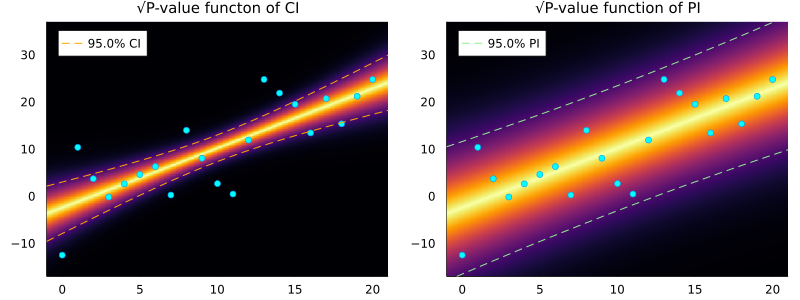

In [23]:
Random.seed!(464937345105963)
x = 0:20
e = rand(Normal(0, 5), length(x))
y = @. 1 + x + e
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:1)...;
    ystars=range(-17, 37, 400))

#### 回帰直線の信頼区間と予測区間に対応するP値函数

β = [-1, 2]
n = 40
r = 1
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0226909200367604
β̂ = [0.7224983356350365]
ŝ = 2.745840198360994


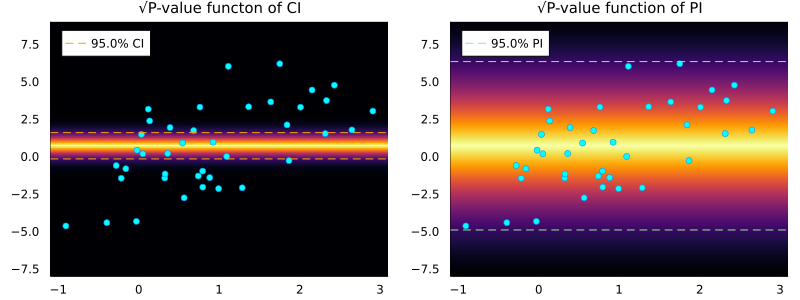

In [24]:
Random.seed!(4649373)
n = 40
β₀, β₁ = β = [-1, 2]
@show β
f_true(x) = β₀ + β₁*x
x = rand(Normal(1, 1), n)
y = f_true.(x) + rand(Normal(0, 2), n)

plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:0)...;
    ystars=range(-8, 9, 400))

n = 40
r = 2
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0243941639119694
β̂ = [-0.8651568001715194, 1.7549089886753282]
ŝ = 2.222022308287274


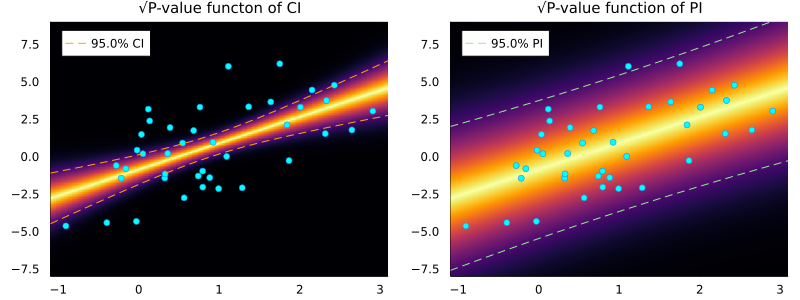

In [25]:
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:1)...;
    ystars=range(-8, 9, 400))

#### 回帰直線の信頼区間に対応するP値函数の動画

β = [-1, 2]


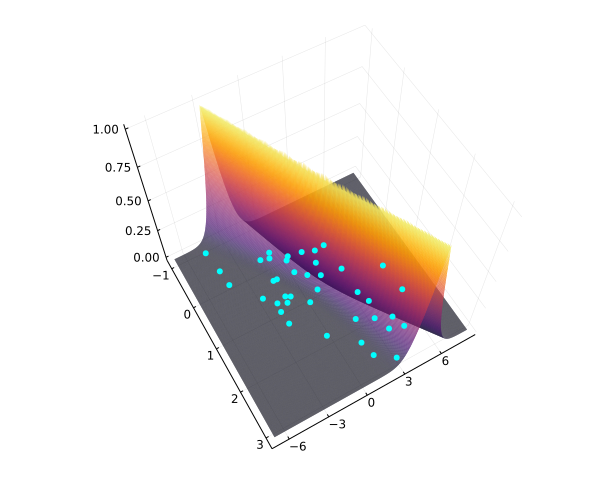

In [26]:
function plot_linreg_confint_pvalfunc_3d(x, y, F...;
        α = 0.05, camera=(60, 60), xstars=nothing, ystars=nothing, kwargs...)
    n = length(x)
    r = length(F)
    X = [fⱼ(xᵢ) for xᵢ in x, fⱼ in F] # design matrix
    β̂ = X \ y # equivalent to β̂ = X*(X'X)\X'y
    ŷ = X * β̂ # orthogonal projection of y onto Xℝʳ
    ŝ = norm(y - ŷ)/√(n - r) # ŝ² is the unbiased estimator of σ²
    tdist = TDist(n - r)
    m = quantile(tdist, 1 - α/2)
    
    f̂(xstar) = sum(β̂ⱼ * fⱼ(xstar) for (β̂ⱼ, fⱼ) in zip(β̂, F))
    f(xstar) = [fⱼ(xstar) for fⱼ in F]
    invXX = inv(X'X)
    g(xstar) = ŝ * √(f(xstar)' * invXX * f(xstar))
    G(xstar, ystar) = 2ccdf(tdist, abs(ystar - f̂(xstar))/g(xstar))

    if isnothing(xstars)
        a, b = extrema(x)
        a, b = a - 0.05(b-a), b + 0.05(b-a)
        xstars = range(a, b, 400)
    end
    a, b = extrema(xstars)
    if isnothing(ystars)
        c, d = extrema(y)
        c, d = c - 0.1m*(d-c), d + 0.1m*(d-c)
        ystars = range(c, d, 400)
    end
    c, d = extrema(ystars)
    
    P = plot(; colorbar=false)
    surface!(xstars, ystars, G; camera, alpha=0.9)
    scatter3d!(x, y, zeros(length(x)); label="", c=:cyan, msc=:auto)
    plot!(size=(600, 500))
    plot!(; kwargs...)
end

Random.seed!(4649373)
n = 40
β₀, β₁ = β = [-1, 2]
@show β
f_true(x) = β₀ + β₁*x
x = rand(Normal(1, 1), n)
y = f_true.(x) + rand(Normal(0, 2), n)

plot_linreg_confint_pvalfunc_3d(x, y, (x -> x^k for k in 0:1)...)

┌ Info: Saved animation to 
│   fn = D:\OneDrive\work\Statistics\2022\images\anim_linreg_confint_pvalfunc_3d.gif
└ @ Plots D:\.julia\packages\Plots\MzlNY\src\animation.jl:130


Plots.AnimatedGif("D:\\OneDrive\\work\\Statistics\\2022\\images\\anim_linreg_confint_pvalfunc_3d.gif")
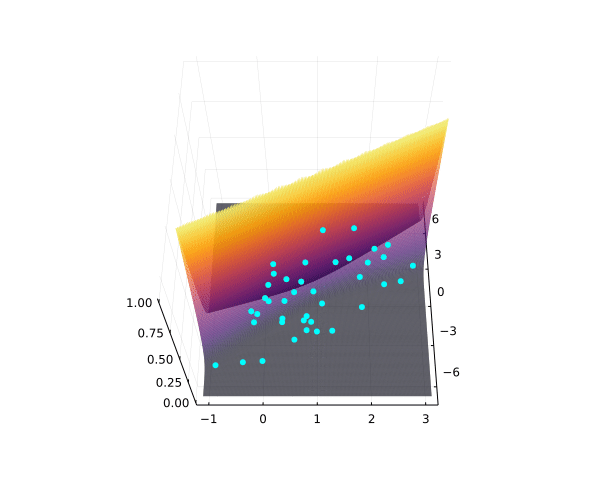

In [27]:
anim = @animate for t in 0:5:359
    plot_linreg_confint_pvalfunc_3d(x, y, (x->x^k for k in 0:1)...; camera=(t, 60))
end
gif(anim, "images/anim_linreg_confint_pvalfunc_3d.gif")

PDFファイルではこのアニメーションは動かない.  動いている様子を見たい人は以下のリンク先を参照せよ.

* [線形回帰の信頼区間に対応するP値函数](https://github.com/genkuroki/Statistics/blob/master/2022/images/anim_linreg_confint_pvalfunc_3d.gif)

#### 多項式回帰の信頼区間と予測区間に対応するP値函数

n = 30
r = 1
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0452296421327034
β̂ = [-0.012921569974331694]
ŝ = 0.7781229227974805


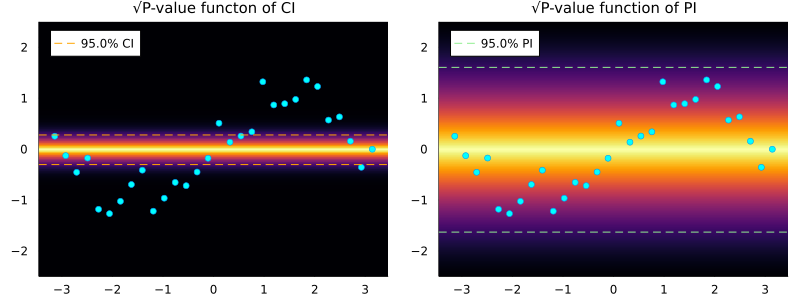

In [28]:
Random.seed!(4649373)

n = 30
f_true(x) = sin(x)
x = range(-π, π, n)
y = f_true.(x) + rand(Normal(0, 0.3), n)
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:0)...;
    ystars=range(-2.5, 2.5, 400))

n = 30
r = 2
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0484071417952445
β̂ = [-0.012921569974331675, 0.25146544548096655]
ŝ = 0.6235650870768796


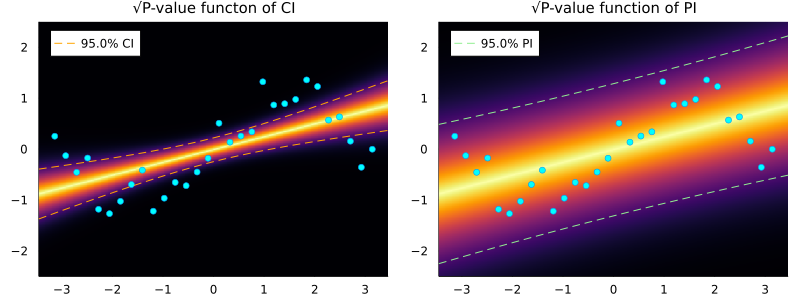

In [29]:
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:1)...;
    ystars=range(-2.5, 2.5, 400))

n = 30
r = 4
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0555294386428726
β̂ = [-0.004868037850388715, 0.9055404522516881, -0.0022900460140340695, -0.10348024677024828]
ŝ = 0.3018043730527076


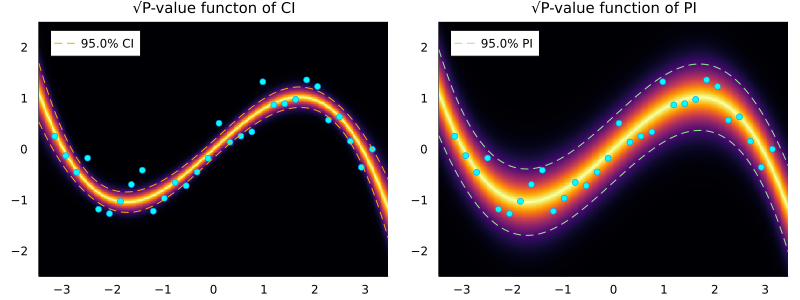

In [30]:
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:3)...;
    ystars=range(-2.5, 2.5, 400))

n = 30
r = 6
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.0638985616280254
β̂ = [-0.026428141042331734, 1.0071582696511716, 0.0182525867063003, -0.14879998365691066, -0.0022800938849420445, 0.003892016571707278]
ŝ = 0.3078837919499401


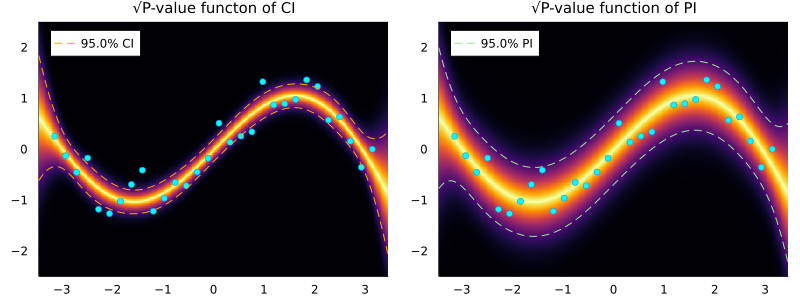

In [31]:
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:5)...;
    ystars=range(-2.5, 2.5, 400))

n = 30
r = 20
α = 0.05
quantile(TDist(n - r), 1 - α / 2) = 2.228138851986274
β̂ = [0.14247028140681808, 1.2914469265448518, -2.862708649041329, -3.1780625037772205, 7.518055380487802, 7.790792095545583, -8.165629013870868, -8.17395305360277, 4.666047726772347, 4.345360937853182, -1.5269201557827485, -1.3012484041405847, 0.2944652989355421, 0.22929508226073686, -0.03296579977722806, -0.023587239919145065, 0.001976582640073381, 0.0013103573390256058, -4.899517106916385e-5, -3.036313618793969e-5]
ŝ = 0.24567191751997788


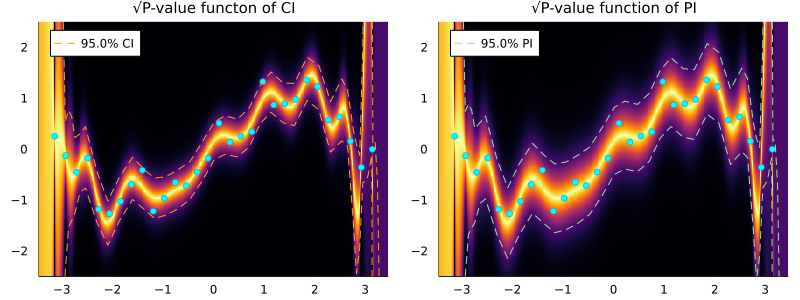

In [32]:
plot_linreg_pvalue_functions(x, y, (x -> x^k for k in 0:19)...;
    ystars=range(-2.5, 2.5, 400))

## ロジスティック回帰

In [33]:
"""ロジスティック回帰のunlink函数"""
p_(xᵢ, β) = logistic(β[1] + β[2]*xᵢ)

"""ロジスティック回帰のunlink函数の導函数"""
function dp_(xᵢ, β)
    pᵢ = logistic(β[1] + β[2]*xᵢ)
    pᵢ * (1 - pᵢ)
end

"""ロジスティック回帰モデルの尤度函数の-1倍"""
function logistic_negloglik(y, x, β)
    -sum(logpdf(Bernoulli(p_(xᵢ, β)), yᵢ) for (xᵢ, yᵢ) in zip(x, y))
end

"""ロジスティック回帰のスコア統計量A"""
function score_A(y, x, β)
    sum(p_(xᵢ, β) - yᵢ for (xᵢ, yᵢ) in zip(x, y))
end

"""ロジスティック回帰のスコア統計量B"""
function score_B(y, x, β)
    sum(xᵢ * (p_(xᵢ, β) - yᵢ) for (xᵢ, yᵢ) in zip(x, y))
end

"""ロジスティック回帰のフィッシャー情報量行列の成分a"""
function fisherinfo_a(x, β)
    sum(dp_(xᵢ, β) for xᵢ in x)
end

"""ロジスティック回帰のフィッシャー情報量行列の成分b"""
function fisherinfo_b(x, β)
    sum(xᵢ * dp_(xᵢ, β) for xᵢ in x)
end

"""ロジスティック回帰のフィッシャー情報量行列の成分c"""
function fisherinfo_c(x, β)
    sum(xᵢ^2 * dp_(xᵢ, β) for xᵢ in x)
end

"""ロジスティック回帰のフィッシャー情報量行列のすべての成分"""
function fisherinfo(x, β)
    a = fisherinfo_a(x, β)
    b = fisherinfo_b(x, β)
    c = fisherinfo_c(x, β)
    a, b, c
end

"""ロジスティック回帰モデルの最尤法"""
function logistic_mle(y, x; alg=LBFGS())
    f(β) = logistic_negloglik(y, x, β)
    o = optimize(f, MVector(0.0, 0.0), alg)
    β̂ = o.minimizer
end

"""ロジスティック回帰モデルの乱数"""
function logistic_rand(x, β)
    rand.(Bernoulli.(p_.(x, Ref(β))))
end

logistic_rand

In [34]:
"""β̂とSEhatの計算"""
function betahat_sehat_star(y, x, xstar; alg=LBFGS())
    β̂ = logistic_mle(y, x; alg)
    â, b̂, ĉ = fisherinfo(x, β̂)
    SEhat = √max(0, safediv(ĉ - 2b̂*xstar + â*xstar^2, â*ĉ - b̂^2))
    β̂, SEhat
end

"""β̂とSEhatとẑの計算"""
function betahat_sehat_zhat_star(y, x, xstar, tstar; alg=LBFGS())
    β̂, SEhat = betahat_sehat_star(y, x, xstar; alg)
    ẑ = safediv(β̂[1] + β̂[2]*xstar - tstar, SEhat)
    β̂, SEhat, ẑ
end

"""ロジスティック回帰のMonte Carloシミュレーション(xstar版)"""
function sim_logistic_regression_star(;
        β=[-4, 2], xstar=1, n=200,
        x=range(-β[1]/β[2]-2, -β[1]/β[2]+2, n),
        L=10^4, alg=LBFGS()
    )
    betahat = Vector{MVector{2, Float64}}(undef, L)
    sehat = Vector{Float64}(undef, L)
    zhat = Vector{Float64}(undef, L)
    tstar = β[1] + β[2]*xstar
    @threads for i in 1:L
        y = logistic_rand(x, β)
        β̂, SEhat, ẑ = betahat_sehat_zhat_star(y, x, xstar, tstar; alg)
        betahat[i] = β̂
        sehat[i] = SEhat
        zhat[i] = ẑ
    end
    betahat, sehat, zhat
end

sim_logistic_regression_star

In [35]:
"""tstarに関するWald型P値函数"""
function pvalue_tstar_wald(y, x, xstar, tstar; alg=LBFGS())
    ẑ = betahat_sehat_zhat_star(y, x, xstar, tstar; alg)[3]
    2ccdf(Normal(), abs(ẑ))
end

"""pstarに関するWald型P値函数"""
function pvalue_pstar_wald(y, x, xstar, pstar; alg=LBFGS())
    tstar = logit(pstar)
    pvalue_tstar_wald(y, x, xstar, tstar; alg)
end

"""tstarに関する信頼区間"""
function confint_tstar_wald(y, x, xstar; α = 0.05, alg=LBFGS())
    z = quantile(Normal(), 1-α/2)
    β̂, SEhat = betahat_sehat_star(y, x, xstar; alg)
    m = β̂[1] + β̂[2]*xstar
    m - z*SEhat, m + z*SEhat
end

"""pstarに関する信頼区間"""
function confint_pstar_wald(y, x, xstar; α = 0.05, alg=LBFGS())
    tL, tU = confint_tstar_wald(y, x, xstar; α, alg)
    logistic(tL), logistic(tU)
end

confint_pstar_wald

In [36]:
function betahat_sehat_beta1(y, x; alg=LBFGS())
    β̂ = logistic_mle(y, x; alg)
    â, b̂, ĉ = fisherinfo(x, β̂)
    SEhat = √max(0, safediv(â, â*ĉ - b̂^2))
    β̂, SEhat
end

function betahat_sehat_zhat_beta1(y, x, β₁; alg=LBFGS())
    β̂, SEhat = betahat_sehat_beta1(y, x; alg)
    β̂₁ = β̂[2]
    zhat = safediv(β̂₁ - β₁, SEhat)
    β̂, SEhat, zhat
end

"""ロジスティック回帰のMonte Carloシミュレーション(β₁版)"""
function sim_logistic_regression_beta1(;
        β=[-4, 2], n=200,
        x=range(-β[1]/β[2]-2, -β[1]/β[2]+2, n),
        L=10^4, alg=LBFGS()
    )
    betahat = Vector{MVector{2, Float64}}(undef, L)
    sehat = Vector{Float64}(undef, L)
    zhat = Vector{Float64}(undef, L)
    @threads for i in 1:L
        y = logistic_rand(x, β)
        β̂, SEhat, ẑ = betahat_sehat_zhat_beta1(y, x, β[2]; alg)
        betahat[i] = β̂
        sehat[i] = SEhat
        zhat[i] = ẑ
    end
    betahat, sehat, zhat
end

sim_logistic_regression_beta1

In [37]:
"""β₁のWald型のP値"""
function pvalue_beta1_wald(y, x, β₁; alg=LBFGS())
    zhat = betahat_sehat_zhat_beta1(y, x, β₁; alg)[3]
    2ccdf(Normal(), abs(zhat))
end

"""β₁のWald型信頼区間"""
function confint_beta1_wald(y, x; α=0.05, alg=LBFGS())
    z = quantile(Normal(), 1-α/2)
    β̂, SEhat = betahat_sehat_beta1(y, x; alg)
    β̂₁ = β̂[2]
    [β̂₁ - z*SEhat, β̂₁ + z*SEhat]
end

confint_beta1_wald

### ロジスティック函数とロジット函数

__ロジスティック函数__ を次のように定める:

$$
\logistic(t) = \frac{1}{1+e^{-t}} \quad (t\in\R)
$$

ロジスティック函数 $f(t)=\logistic(t)$ は微分方程式

$$
f'(t) = f(t)(1-f(t)),  \quad f(0) = \frac{1}{2}
$$

を満たしており(自分で確認せよ), この条件を満たす函数 $f(t)$ はロジスティック函数になる.

ロジスティック函数の微分が出て来る計算は上の微分方程式を使うと楽にできる.

ロジスティック函数は狭義単調増加函数で, $t\to-\infty$ のとき $0$ に収束し, $t\to\infty$ で $1$ に収束する.

ロジスティック函数 $p=\logistic(t)$ ($t\in\R$) の値域は $0 < p < 1$ になる.

ロジスティック函数 $p=\logistic(t)$ の逆函数は __ロジット函数__ と呼ばれている. ロジット函数は対数オッズ函数であり, 次のように表される:

$$
\logit(p) = \log\frac{p}{1-p} \quad (0<t<1).
$$

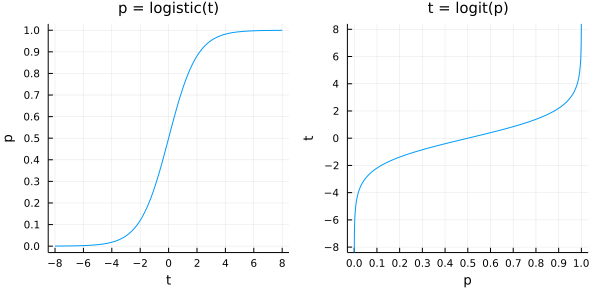

In [38]:
P1 = plot(logistic, -8, 8;
    label="", title = "p = logistic(t)",
    xguide="t", yguide="p", legend=:topleft,
    xtick=-10:2:10, ytick=0:0.1:1)
P2 = plot(logit, 0, 1;
    label="", title="t = logit(p)",
    ytick=-10:2:10, xtick=0:0.1:1,
    xguide="p", yguide="t", legend=:topleft,
    ylim=(-8.4, 8.4), bottommargin=4Plots.mm)
plot(P1, P2; size=(600, 300), tickfontsize=7)

### ロジスティック回帰のデータの形

データは以下の形で得られると仮定する:

$$
(x_1,y_1),\ldots,(x_n,y_n) \in \R\times\{1,0\}.
$$

$x_i$ 達は実数で $y_i$ 達は $1$ または $0$ であるとする.

このデータは各 $x_i$ ごとに $x_i$ の値に応じである確率で $y_i$ の値がランダムに $1$ または $0$ の値になるのように解釈できると仮定する.

この形のデータを2つのベクトルで表す:

$$
x = \begin{bmatrix} x_1 \\ \vdots \\ x_n \\ \end{bmatrix} \in \R^n, \quad 
y = \begin{bmatrix} y_1 \\ \vdots \\ y_n \\ \end{bmatrix} \in \{1,0\}^n.
$$

### ロジスティック回帰でのリンク函数

ベクトル値の回帰係数パラメータ

$$
\beta=\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} \in\R^2
$$

を考え, 確率パラメータ達 $0 < p_i < 1$ が次のように表されていると仮定する:

$$
p_i = \logistic(\beta_0 + \beta_1 x_i).
$$

すなわち, 

$$
\logit(p_i) = \log\frac{p_i}{1-p_i} = \beta_0 + \beta_1 x_i.
$$

このときロジット函数を __リンク函数__ (link function)と呼び, ロジスティック函数を __アンリンク函数__ (unlink function)と呼ぶことがある.

__注意:__ $p_i$ 達のリンク函数として対数函数を使った場合には

$$
\log p_i = \beta_0 + \beta_1 x_i
$$
による回帰を考え, リンク函数として恒等函数を使った場合には

$$
p_i = \beta_0 + \beta_1 x_i
$$

による回帰を考えることになる.  どれを使うのが適切であるかは目的によって変わる. __注意終__

### ロジスティック回帰の統計モデル

前節までの記号の下で, 統計モデルとして $y\in\{1,0\}^n$ に関する以下の確率質量函数を採用する:

$$
P(y|x,\beta) =
\prod_{i=1}^n \left(
p_i^{y_i}(1 - p_i)^{1-y_i}
\right)=
\prod_{i=1}^n \left(
\logistic(\beta_0+\beta_1 x_i)^{y_i}(1 - \logistic(\beta_0+\beta_1 x_i))^{1-y_i}
\right)
$$

このモデルの確率分布を $\LogisticModel(x, \beta)$ と書くと,

$$
\LogisticModel(x, \beta) = \prod_{i=1}^n \Bernoulli(\logistic(\beta_0+\beta_1 x_i)).
$$

これは最も簡単な場合でもっと複雑なモデルを考えることもできる. (例えば $\beta_0+\beta_1 x_i$ の部分をもっと複雑にできる).

$Y=[Y_i]_{i=1}^n$ をこの統計モデルに従う確率変数であるとする. 

このとき, 各 $Y_i$ の値は次のようにしてランダムに決まると考えることができる:

(1) $x_i$ の値に対する確率パラメータ $p_i$ の値が $p_i = \logistic(\beta_0 + \beta_1 x_i)$ で決まる.

(2) $Y_i$ の値はランダムに決まり, 確率 $p_i$ で $1$ になり, 確率 $1-p_i$ で $0$ になる.

$x_i$ 達から $Y_i=1,0$ 達の値を確率的に決定する確率パラメータ達を

$$
p_i = \logistic(\beta_0 + \beta_1 x_i) \quad
\left(\iff \logit(p_i) = \log\frac{p_i}{1-p_i} = \beta_0 + \beta_1 x_i\right)
$$

の形式で推定することが, __ロジスティック回帰__ と呼ばれている.

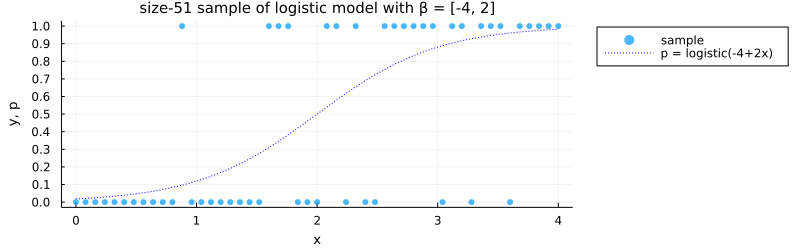

In [39]:
# ロジスティック回帰モデルのサンプル(データ)の生成
#Random.seed!(4649373)
β₀, β₁ = β = [-4, 2]
n = 51
x = range(-β₀/β₁-2, -β₀/β₁+2, n)
#y = logistic_rand(x, β)
y = Bool[
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
    1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]

# モデルとデータの視覚化
scatter(x, y; label="sample", msc=:auto, alpha=0.7)
plot!(xstar -> logistic(β[1] + β[2]*xstar);
    label="p = logistic($(β₀)+$(β₁)x)", c=:blue, ls=:dot)
plot!(ytick=0:0.1:1, yguide="y, p", xguide="x")
title!("size-$n sample of logistic model with β = $β")
plot!(legend=:outertopright, size=(800, 250),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

### 最尤法

データの数値 $x\in\R^n$, $y\in\{1,0\}^n$ に対して, 前節で定義した統計モデルの尤度函数の対数の $-1$ 倍 $L = L(\beta)$ は次の形になる:

$$
L = L(\beta) = -\log p(y|x,\beta) = -
\sum_{i=1}^n\left(y_i\log p_i + (1-y_i)\log(1-p_i)\right).
$$

ここで,

$$
p_i = \logistic(\beta_0 + \beta_1 x_i) \quad (i=1,\ldots,n).
$$

対数尤度函数の $-1$ 倍 $L(\beta)$ を最小化する $\beta$ を $\betahat=[\betahat_0, \betahat_1]^T$ と書き, __最尤法の解__ (さいゆうほうの解)と呼ぶことにする.

特別な場合を除いて, 最尤法の計算はコンピュータによる最適化の数値計算によって行うことになる. (その手法も色々ある.)

(β₀, β₁) = (-4, 2)
(β̂₀, β̂₁) = (-3.3771836845450944, 1.5218694635151835)


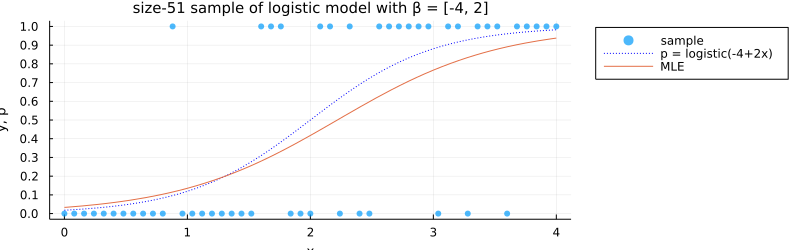

In [40]:
# ロジスティック回帰の実行例
# 上の方で定義されている logistic_mle(y, x) 函数の定義の中で,
# Optim.jl パッケージの optimize 函数が使われている.
β̂₀, β̂₁ = β̂ = logistic_mle(y, x)
@show β₀, β₁
@show β̂₀, β̂₁

# ロジスティック回帰の実行結果の視覚化
scatter(x, y; label="sample", msc=:auto, alpha=0.7)
plot!(xstar -> logistic(β[1] + β[2]*xstar);
    label="p = logistic($(β₀)+$(β₁)x)", c=:blue, ls=:dot)
plot!(xstar -> logistic(β̂₀ + β̂₁*xstar); label="MLE", c=2)
plot!(ytick=0:0.1:1, yguide="y, p", xguide="x")
title!("size-$n sample of logistic model with β = $β")
plot!(legend=:outertopright, size=(800, 250))

### スコア統計量とFisher情報量行列

この節では $y=[y_i]_{i=1}^n$ はロジスティック回帰の統計モデルに従う確率変数であるとする. (「ロジスティック回帰の統計モデル」の節ではこれを $Y$ と書いていたが, 前節の記号をそのまま使いたいので, $y=[y_i]_{i=1}^n$ と書くことにする. 一種の手抜き.)

以下では, ロジスティック函数が満たす微分方程式から得られる次の公式を自由に用いる:

$$
\frac{\partial p_i}{\partial\beta_0} = p_i(1-p_i), \quad
\frac{\partial p_i}{\partial\beta_1} = x_i p_i(1-p_i).
$$

__スコア統計量__ $A=A(\beta)$, $B=B(\beta)$ を次のように定める:

$$
\begin{aligned}
&
A = A(\beta) =
\frac{\partial L}{\partial\beta_0} = -\sum_{i=1}^n(y_i(1-p_i)-(1-y_i)p_i) =
\sum_{i=1}^n(p_i - y_i),
\\ &
B = B(\beta) =
\frac{\partial L}{\partial\beta_1} = -\sum_{i=1}^n(x_i y_i(1-p_i)-x_i(1-y_i)p_i) =
\sum_{i=1}^n x_i(p_i - y_i).
\end{aligned}
$$

$\beta$ は $p_i=\logistic(\beta_0+\beta_1 x_i)$ の中に含まれている.

$y_i$ は確率 $p_i$ で $1$ になり, 確率 $1-p_i$ で $0$ になるので, $E[A]=E[B]=0$ となる.

最尤法の解 $\betahat$ は $L=L(\beta)$ を最小化するので,

$$
A(\betahat) = B(\betahat) = 0
$$

を満たしている. ベクトル値確率変数 $U=U(\beta)$ を次のように定める:

$$
U = U(\beta) = \begin{bmatrix} A(\beta) \\ B(\beta) \end{bmatrix}
$$

この $U$ をも __スコア統計量__ と呼ぶことにする.

__Fisher情報量行列__ の成分 $a = a(\beta)$, $b = b(\beta)$, $c = c(\beta)$ を以下のように定める:

$$
\begin{aligned}
&
a = a(\beta) =
\frac{\partial^2 L}{\partial\beta_0^2} = \sum_{i=1}^n p_i(1-p_i),
\\ &
b = b(\beta) =
\frac{\partial^2 L}{\partial\beta_0\partial\beta_1} = \sum_{i=1}^n x_i p_i(1-p_i),
\\ &
c = c(\beta) =
\frac{\partial^2 L}{\partial\beta_1^2} = \sum_{i=1}^n x_i^2 p_i(1-p_i).
\end{aligned}
$$

$E[(y_i-p_i)^2]=E[y_i^2]-E[y_i]^2=E[y_i]-E[y_i]^2=p_i-p_i^2=p_i(1-p_i)$ を使った直接的な計算によって, $a$, $c$ はそれぞれスコア統計量 $A$, $B$ の分散に等しく, $b$ はスコア統計量 $A,B$ の共分散に等しいことを示せる(実はこのようなことは一般的に成立している):

$$
a = E[A^2], \quad b = E[AB], \quad c = E[B^2].
$$

__Fisher情報量行列__ $I(\beta)$ を次のように定める:

$$
I(\beta) =
\begin{bmatrix}
a(\beta) & b(\beta) \\
b(\beta) & c(\beta) \\
\end{bmatrix}.
$$

Fisher情報量行列 $I(\beta)$ はスコア統計量 $U(\beta) = [A(\beta), B(\beta)]^T$ の分散共分散行列になっている.

__注意:__ Fisher情報量行列を $I(\beta)$ と単位行列を混同しないこと!

__注意:__ 「Fisher情報量行列」のような何か非常に高級で難しそうな名前が付いているという理由で「これは難しいものだ」と判断してはいけない. 上の場合には, その成分は対数尤度函数の $-1$ 倍 $L=L(\beta)$ を2回偏微分しただけのものに過ぎず, $L=L(\beta)$ を1回偏微分して得られるスコア統計量の分散共分散行列を与える量になっている行列であるに過ぎない. 付けられた名前の権威に負けて恐れを持ってはいけない.  恐れを持たずに数学的な内容だけを見ればよい.

__注意:__ Fisher情報量行列の一般的な場合の定義では, 成分を定義するときには2回偏微分した後に期待値を取る. 上でそうなっていない理由は期待値を取る前の2階の偏微分の段階ですでに定数になってしまっているからである.

### 問題: 一般の場合のスコア統計量とFisher情報量行列

一般のパラメータ $\theta=(\theta_1,\ldots,\theta_d)$ を持つ統計モデル $p(y|\theta)$ とそれに従う確率変数 $y$ が与えられていて, $y$ の対数尤度函数の $-1$ 倍を $L(\theta) = -\log p(y|\theta)$ と書くとき(これは確率変数 $y$ に依存するので確率変数になる), __スコア統計量__ $U=[U_i]_{i=1}^n$ が

$$
U_i = \frac{\partial}{\partial\theta_i} L(\theta)
$$

と定義され, __Fisher情報量行列__ $I(\theta)$ の $(i,j)$ 成分 $I_{ij}(\theta)$ が

$$
I_{ij}(\theta) =
E\left[\frac{\partial^2}{\partial\theta_i\partial\theta_j} L(\theta)\right]
$$

と定義される. ここで $E[\ ]$ は確率変数 $y$ に関する期待値を取る操作である. 次が成立することを示せ:

$$
E[U_i] = 0, \quad
E[U_i U_j] = I_{ij}(\theta).
$$

__解答例:__ $E[U_i]=0$ を示そう.  $p(y|\theta)$ の $\theta_i$ に関する偏導函数を $p_{\theta_i}(y|\theta)$ と書くと,

$$
\begin{aligned}
E[U_i] &=
E\left[\frac{\partial}{\partial\theta_i} L(\theta)\right] =
-E\left[\frac{\partial}{\partial\theta_i} \log p(y|\theta)\right] =
-E\left[\frac{p_{\theta_i}(y|\theta)}{p(y|\theta)}\right]
\\ &=
-\int \frac{p_{\theta_i}(y|\theta)}{p(y|\theta)}\,p(y|\theta)\,dy =
-\int p_{\theta_i}(y|\theta)\,dy \\ &=
-\frac{\partial}{\partial\theta_i} \int p(y|\theta)\,dy =
-\frac{\partial}{\partial\theta_i} 1 =
0.
\end{aligned}
$$

$I_{ij}(\theta) = E[U_i U_j]$ を示そう. $p(y|\theta)$ の2階の偏導函数を $p_{\theta_i\theta_j}(y|\theta)$ と書くと, 上と同様にして,

$$
E\left[\frac{p_{\theta_i\theta_j}(y|\theta)}{p(y|\theta)}\right] =
\int p_{\theta_i\theta_j}(y|\theta)\,dy =
\frac{\partial^2}{\partial\theta_i\partial\theta_j} \int p(y|\theta)\,dy =
0.
$$

これを使うと,

$$
\begin{aligned}
I_{ij}(\theta) &=
E\left[\frac{\partial^2}{\partial\theta_i\partial\theta_j} L(\theta)\right] =
-E\left[\frac{\partial^2}{\partial\theta_i\partial\theta_j} \log p(y|\theta)\right]
\\ &=
-E\left[
\frac{p_{\theta_i\theta_j}(y|\theta)}{p(y|\theta)} -
\frac{p_{\theta_i}(y|\theta)p_{\theta_j}(y|\theta)}{p(y|\theta)^2}
\right]
\\ &=
E\left[
\frac{p_{\theta_i}(y|\theta)}{p(y|\theta)^2}
\frac{p_{\theta_j}(y|\theta)}{p(y|\theta)^2}
\right] =
E[U_i U_j].
\end{aligned}
$$

__解答終__

__注意:__ 前節の最後の注意で「Fisher情報量行列という名前に権威を感じて恐れを持つな」と述べたが, ここまで来れた人は数理統計学の面白い部分まで十分に到達できていると考えられるので, 自分自身を誇って良いと思われる.

### βの最尤推定量の分布の正規分布近似

スコア統計量 $U(\beta) = [A(\beta), B(\beta)]^T$ は次のように多変量正規分布に近似的に従っていると仮定する:

$$
U(\beta) = \begin{bmatrix} A(\beta) \\ B(\beta) \end{bmatrix}
\sim \MvNormal(0, I(\beta)), \ \text{approximately}.
$$

最尤法の解で得られる $\beta$ の推定量 $\betahat$ を使って, 統計量 $\ha, \hb, \hc$ を次のように定める:

$$
\ha = a(\betahat), \quad
\hb = b(\betahat), \quad
\hc = c(\betahat).
$$

このとき, $A(\betahat)=B(\betahat)=0$ でかつ

$$
a = \frac{\partial A}{\partial\beta_0}, \quad
b = \frac{\partial A}{\partial\beta_1} = \frac{\partial B}{\partial\beta_0}, \quad
c = \frac{\partial B}{\partial\beta_1}
$$

なので, 次の一次近似が成立している(1次までのTaylor展開):

$$
\begin{aligned}
&
A(\beta) \approx A(\betahat) +
\frac{\partial A}{\partial\beta_0}(\betahat)(\beta_0 - \betahat_0) +
\frac{\partial A}{\partial\beta_1}(\betahat)(\beta_1 - \betahat_1) =
\ha(\beta_0 - \betahat_0) + \hb(\beta_1 - \betahat_1),
\\ &
B(\beta) \approx B(\betahat) +
\frac{\partial B}{\partial\beta_0}(\betahat)(\beta_0 - \betahat_0) +
\frac{\partial B}{\partial\beta_1}(\betahat)(\beta_1 - \betahat_1) =
\hb(\beta_0 - \betahat_0) + \hc(\beta_1 - \betahat_1).
\end{aligned}
$$

すなわち, 

$$
\begin{bmatrix} A \\ B \end{bmatrix} \approx
\begin{bmatrix}
\ha & \hb \\
\hb & \hc \\
\end{bmatrix}
\begin{bmatrix} \beta_0-\betahat_0 \\ \beta_1-\betahat_1 \end{bmatrix}.
$$

ゆえに,

$$
\begin{bmatrix} \betahat_0 \\ \betahat_1 \end{bmatrix} \approx
\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} -
\begin{bmatrix}
\ha & \hb \\
\hb & \hc \\
\end{bmatrix}^{-1}
\begin{bmatrix} A \\ B \end{bmatrix}.
$$

これより,

$$
\betahat
\sim \MvNormal(\beta,\; I(\betahat)^{-1} I(\beta) I(\betahat)^{-1}),
\ \text{approximately}.
$$

さらに次の近似も成立していると仮定する:

$$
I(\betahat) \approx I(\beta).
$$

この仮定のもとで

$$
\betahat
\sim \MvNormal(\beta,\; I(\betahat)^{-1}),
\ \text{approximately}.
$$

  3.044214 seconds (6.43 M allocations: 316.230 MiB, 4.31% gc time, 74.25% compilation time)
  3.537139 seconds (2.89 M allocations: 168.000 MiB)


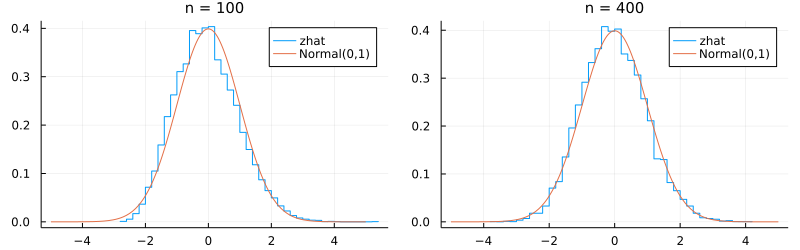

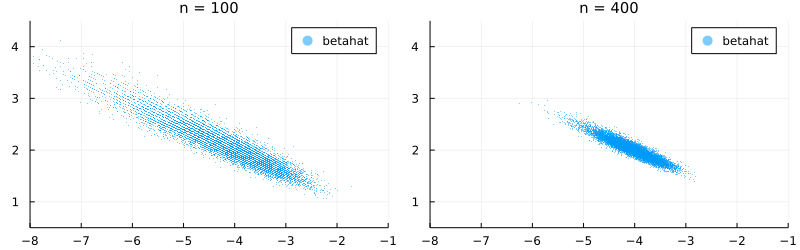

In [41]:
# ẑの分布が標準正規分布で近似されることの確認
# β̂の分布の視覚化
PP, QQ = [], []
for n in (100, 400)
    @time betahat, sehat, zhat = sim_logistic_regression_star(; n)
    P = stephist(zhat; norm=true, label="zhat")
    plot!(Normal(), -5, 5; label="Normal(0,1)")
    title!("n = $n")
    push!(PP, P)
    Q = scatter(first.(betahat), last.(betahat);
        label="betahat", msc=:auto, alpha=0.5, ms=1)
    title!("n = $n")
    plot!(xlim=(-8, -1), ylim=(0.5, 4.5), xtick=-10:10)
    push!(QQ, Q)
end
plot(PP...; size=(800, 250), layout=(1, 2)) |> display
plot(QQ...; size=(800, 250), layout=(1, 2)) |> display

### ロジスティック回帰における β₀+β₁x に関するWald型のP値函数と信頼区間

一般にベクトル値確率変数 $V=[V_i]_{i=1}^n\sim\MvNormal(\mu, \Sigma)$ と $c\in\R^n$ について,

$$
\begin{aligned}
E[V^T c] &= \mu^T c,
\\
\var(V^T c) &= E[(V^T c - \mu^T c)^2] = E[((V-\mu)^T c)^2] =
E[((V-\mu)^T c)^T((V-\mu)^T c)] \\ &= E[(c^T(V-\mu))(V-\mu)^T c] =
c^T E[(V-\mu))(V-\mu)^T] c =
c^T \Sigma c.
\end{aligned}
$$

$x_*\in\R$ を任意に取って, この結果を $V = \betahat$, $c = [1, x_*]^T$ と

$$
\Sigma = I(\beta)^{-1} =
\frac{1}{ac-b^2}
\begin{bmatrix}
 c & -b \\
-b &  a \\
\end{bmatrix}
$$

に適用すると, 

$$
V^T c = \betahat_0 + \betahat_1 x_*, \quad
c^T\Sigma c = \frac{c - 2b x_* + a x_*^2}{ac-b^2}
$$

なので,

$$
\SEhat_{\betahat_0+\betahat_1 x_*} =
\sqrt{\frac{\hc - 2\hb x_* + \ha x_*^2}{\ha\hc-\hb^2}}
$$

とおくと,

$$
\betahat_0 + \betahat_1 x_* \sim
\Normal\left(
\beta_0+\beta_1 x_*,\;
\SEhat_{\betahat_0+\betahat_1 x_*}
\right),
\ \text{approximately}.
$$

以上の結果を使うと, 「$x_*$ に対応する $y_*$ の値が $1$ になる確率が $p_* = \logistic(\beta_0 + \beta_1 x_*)$ である」という仮説のWald型のP値を次のように定めることができる:

$$
\pvalue_{\Wald}(y|x,x_*,\beta) =
2(1 - \cdf(\Normal(0,1), \hz(x_*,\beta)).
$$

ここで,

$$
\hz(x_*,\beta) =
\frac{(\betahat_0+\betahat_1 x_*) - (\beta_0+\beta_1 x_*)}{\SEhat_{\betahat_0+\betahat_1 x_*}}.
$$

有意水準 $0<\alpha<1$ を任意に取り, $z_{\alpha/2}$ を次のように定める:

$$
z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2).
$$

Wald型P値函数には $t_* = \beta_0+\beta_1 x_*$ に関する次の信頼区間が対応している:

$$
\confint^{\beta_0+\beta_1 x_*}_{\Wald}(y|x,x_*,\alpha) =
\left[
\betahat_0+\betahat_1 x_* - z_{\alpha/2}\SEhat_{\betahat_0+\betahat_1 x_*},\;
\betahat_0+\betahat_1 x_* + z_{\alpha/2}\SEhat_{\betahat_0+\betahat_1 x_*}
\right].
$$

これを $p_* = \logistic(\beta_0+\beta_1 x_*)$ に関する信頼区間に書き直すと,

$$
\begin{aligned}
&
\confint^{p_*}_{\Wald}(y|x,x_*,\alpha)
\\ &=
\left[
\logistic\left(
\betahat_0+\betahat_1 x_* - z_{\alpha/2}\SEhat_{\betahat_0+\betahat_1 x_*}
\right),\;
\logistic\left(
\betahat_0+\betahat_1 x_* + z_{\alpha/2}\SEhat_{\betahat_0+\betahat_1 x_*}
\right)
\right].
\end{aligned}
$$

(β₀, β₁) = (-4, 2)
(β̂₀, β̂₁) = (-3.3771836845450944, 1.5218694635151835)

pvalue_pstar_wald(y, x, 2, 0.2) = 0.004572848447696335
pvalue_pstar_wald(y, x, 2, 0.3) = 0.1663647854267721
pvalue_pstar_wald(y, x, 2, 0.4) = 0.8461954258378921
pvalue_pstar_wald(y, x, 2, 0.5) = 0.3691434652302312
pvalue_pstar_wald(y, x, 2, 0.6) = 0.046576295012251176


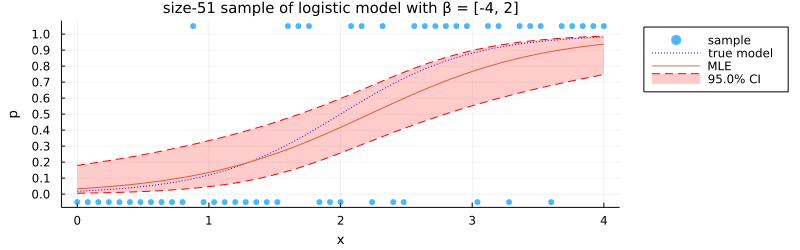

In [42]:
# ロジスティック回帰モデルのサンプル(データ)の生成
#Random.seed!(4649373)
β₀, β₁ = β = [-4, 2]
n = 51
x = range(-β₀/β₁-2, -β₀/β₁+2, n)
#y = logistic_rand(x, β)
y = Bool[
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
    1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]

# ロジスティック回帰
β̂₀, β̂₁ = β̂ = logistic_mle(y, x)
@show β₀, β₁
@show β̂₀, β̂₁
println()

# P値の例
for pstar in 0.2:0.1:0.6
    @eval @show pvalue_pstar_wald(y, x, 2, $pstar)
end

# 95%信頼区間の視覚化
α = 0.05
scatter(x, (yᵢ -> yᵢ==0 ? -0.05 : 1.05).(y); label="sample", msc=:auto, alpha=0.7)
plot!(xstar -> logistic(β₀ + β₁*xstar);
    label="true model", c=:blue, ls=:dot)
plot!(xstar -> logistic(β̂₀ + β̂₁*xstar); label="MLE", c=2)
plot!(xstar -> confint_pstar_wald(y, x, xstar; α)[1];
    fillrange = xstar -> confint_pstar_wald(y, x, xstar; α)[2],
    label="$(100(1-α))% CI", c=:red, ls=:dash, fillalpha=0.2)
plot!(xstar -> confint_pstar_wald(y, x, xstar; α)[2];
    label="", c=:red, ls=:dash)
plot!(ytick=0:0.1:1, yguide="p", xguide="x")
title!("size-$n sample of logistic model with β = $β")
plot!(legend=:outertopright, size=(800, 250),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

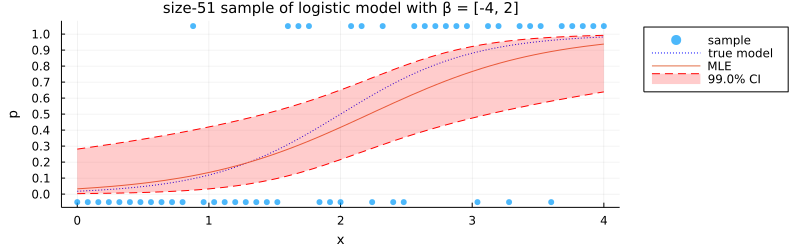

In [43]:
# 99%信頼区間の視覚化
α = 0.01
scatter(x, (yᵢ -> yᵢ==0 ? -0.05 : 1.05).(y); label="sample", msc=:auto, alpha=0.7)
plot!(xstar -> logistic(β₀ + β₁*xstar);
    label="true model", c=:blue, ls=:dot)
plot!(xstar -> logistic(β̂₀ + β̂₁*xstar); label="MLE", c=2)
plot!(xstar -> confint_pstar_wald(y, x, xstar; α)[1];
    fillrange = xstar -> confint_pstar_wald(y, x, xstar; α)[2],
    label="$(100(1-α))% CI", c=:red, ls=:dash, fillalpha=0.2)
plot!(xstar -> confint_pstar_wald(y, x, xstar; α)[2];
    label="", c=:red, ls=:dash)
plot!(ytick=0:0.1:1, yguide="p", xguide="x")
title!("size-$n sample of logistic model with β = $β")
plot!(legend=:outertopright, size=(800, 250),
    leftmargin=4Plots.mm, bottommargin=4Plots.mm)

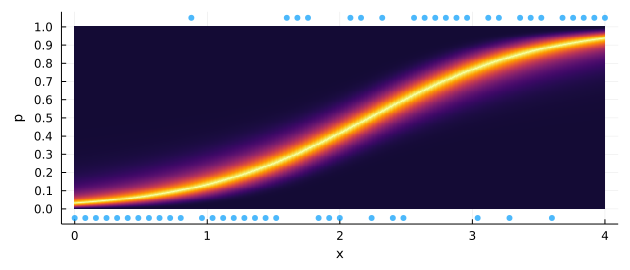

In [44]:
# P値函数の視覚化

xstars = range(0, 4, 400)
pstars = range(0, 1, 200)
heatmap(xstars, pstars, (xstar, pstar) -> pvalue_pstar_wald(y, x, xstar, pstar);
    clim=(-0.1, 1), colorbar=false)
scatter!(x, (yᵢ -> yᵢ==0 ? -0.05 : 1.05).(y); label="", msc=:auto, alpha=0.7, c=1)
plot!(ytick=0:0.1:1, yguide="p", xguide="x")
plot!(xlim=(-0.1, 4.1))
plot!(size=(630, 270), leftmargin=4Plots.mm, bottommargin=4Plots.mm)

横軸の値 $x_*$ ごとにパラメータ値 $p_*$ にP値を対応させるP値函数が決まっている.

上のヒートマップで明るい所ほどP値が大きい.

P値が「暗過ぎない部分」が信頼区間になっている.

### ロジスティック回帰における β₁ に関するWald型のP値函数と信頼区間

$\beta_0 + \beta_1 x_*$ に関するP値函数と信頼区間で $x_*=0$ の場合を考えれば $\beta_0$ に関するP値函数と信頼区間が得られる. 以下では $\beta_1$ に関するP値函数と信頼区間を構成しよう.

この節でも次の近似が使えると仮定する:

$$
\betahat = \begin{bmatrix} \betahat_0 \\ \betahat_1 \end{bmatrix}
\sim \MvNormal(\beta,\; I(\betahat)^{-1}),
\ \text{approximately}.
$$

このとき,

$$
\SEhat_{\betahat_1} = \sqrt{\frac{\ha}{\ha\hc - \hb^2}} =
\left(\text{$I(\betahat)^{-1}$ の $(2,2)$ 成分の平方根}\right)
$$

とおくと,

$$
\betahat_1 \sim \Normal\left(\beta_1, \SEhat_{\betahat_1}\right),
\ \text{approximately}.
$$

これにより, 「一次の項の係数が $\beta_1$ である」という仮説のWald型のP値を次のように定めることができる:

$$
\pvalue_{\Wald}(y|x,\beta_1) = 2(1 - \cdf(\Normal(0,1), |\hz(\beta_1)|)).
$$

ここで,

$$
\hz(\beta_1) = \frac{\betahat_1 - \beta_1}{\SEhat_{\betahat_1}}.
$$

これに対応する $\beta_1$ に関する信頼区間は次のようになる:

$$
\confint^{\beta_1}_{\Wald}(y|x,\alpha) =
\left[
\betahat_1 - z_{\alpha/2}\SEhat_{\betahat_1},\;
\betahat_1 + z_{\alpha/2}\SEhat_{\betahat_1}
\right].
$$

ここで, $z_{\alpha/2} = \quantile(\Normal(0,1), 1-\alpha/2)$.

  1.152886 seconds (3.00 M allocations: 133.845 MiB, 15.16% compilation time)
  3.255637 seconds (2.89 M allocations: 168.034 MiB)


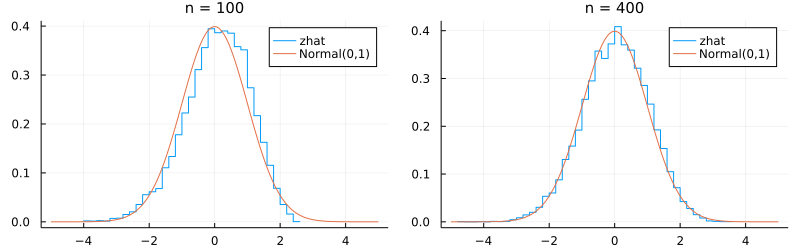

In [45]:
# ẑ(β₁)が近似的に標準正規分布に従うことの確認
β₀, β₁ = β = [-4, 2]
PP = []
for n in (100, 400)
    @time betahat, sehat, zhat = sim_logistic_regression_beta1(; β, n)
    P = stephist(zhat; norm=true, label="zhat")
    plot!(Normal(), -5, 5; label="Normal(0,1)")
    title!("n = $n")
    push!(PP, P)
end
plot(PP...; size=(800, 250), layout=(1, 2))

n = 51
(β₀, β₁) = (-4, 2)
(β̂₀, β̂₁) = (-3.3771836845450944, 1.5218694635151835)
pvalue_beta1_wald(y, x, β₁) = 0.23754555186875032
ci = confint_beta1_wald(y, x) = [0.7284702769932621, 2.3152686500371047]


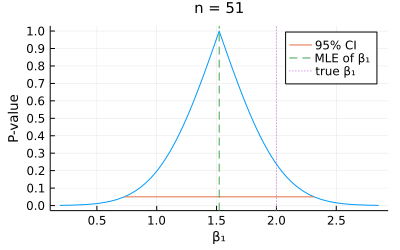

In [46]:
# ロジスティック回帰モデルのサンプル(データ)の生成
#Random.seed!(4649373)
β₀, β₁ = β = [-4, 2]
n = 51
x = range(-β₀/β₁-2, -β₀/β₁+2, n)
#y = logistic_rand(x, β)
y = Bool[
    0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
    1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1,
    1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1]
@show n

# ロジスティック回帰
β̂₀, β̂₁ = β̂ = logistic_mle(y, x)
@show β₀, β₁
@show β̂₀, β̂₁

# P値の例
@show pvalue_beta1_wald(y, x, β₁)

# 信頼区間
@show ci = confint_beta1_wald(y, x)

# P値函数と信頼区間の視覚化
xlim = confint_beta1_wald(y, x; α=0.001)
plot(β₁ -> pvalue_beta1_wald(y, x, β₁), xlim...; label="")
plot!(ytick=0:0.1:1, yguide="P-value", xguide="β₁")
plot!(ci, fill(0.05, 2); label="95% CI")
vline!([β̂₁]; label="MLE of β₁", ls=:dash) # maximum likelihood estimate of β₁
vline!([β₁]; label="true β₁", ls=:dot)
title!("n = $n")

青の線は $\beta_1$ のP値函数であり, 橙色の線分は $\beta_1$ の $95\%$ 信頼区間である.

信頼区間はP値函数を有意水準の高さで切断すると得られる.

緑の縦破線は $\beta_1$ の最尤推定値であり, 紫色の縦点線はテストデータを生成するために使ったパラメータの $\beta_1$ である.

__注意:__ 「真のパラメータ値」(true parameter value)の意味は「現実における真の値」という意味ではなく, 「テストデータを生成するために使ったパラメータの値」という意味であることが多い点に注意を払わなければいけない.

n = 51
(β₀, β₁) = (-4, 2)
(β̂₀, β̂₁) = (-2.5752705372489446, 1.2582835733068818)
pvalue_beta1_wald(y, x, β₁) = 0.03492292470138703
ci = confint_beta1_wald(y, x) = [0.5690637954332737, 1.9475033511804898]


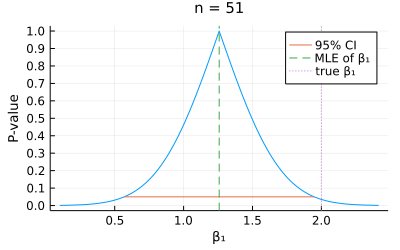

In [47]:
# ロジスティック回帰モデルのサンプル(データ)の生成
#Random.seed!(4649373837)
β₀, β₁ = β = [-4, 2]
n = 51
x = range(-β₀/β₁-2, -β₀/β₁+2, n)
#y = logistic_rand(x, β)
y = Bool[
    0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
    1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
    1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1]
@show n

# ロジスティック回帰
β̂₀, β̂₁ = β̂ = logistic_mle(y, x)
@show β₀, β₁
@show β̂₀, β̂₁

# P値の例
@show pvalue_beta1_wald(y, x, β₁)

# 信頼区間
@show ci = confint_beta1_wald(y, x)

# P値函数と信頼区間の視覚化
xlim = confint_beta1_wald(y, x; α=0.001)
plot(β₁ -> pvalue_beta1_wald(y, x, β₁), xlim...; label="")
plot!(ytick=0:0.1:1, yguide="P-value", xguide="β₁")
plot!(ci, fill(0.05, 2); label="95% CI")
vline!([β̂₁]; label="MLE of β₁", ls=:dash) # maximum likelihood estimate of β₁
vline!([β₁]; label="true β₁", ls=:dot)
title!("n = $n")

上の数値例では, データを生成するために使ったパラメータ値の $\beta_1 = 1$ が $95\%$ 信頼区間に含まれていない.

### ロジスティック回帰における β₁ に関するWald型のP値函数と信頼区間の動画

 49.771310 seconds (20.80 M allocations: 832.833 MiB, 0.48% gc time, 1.67% compilation time)


┌ Info: Saved animation to 
│   fn = D:\OneDrive\work\Statistics\2022\images\anim_logisticreg_beta1_confint_pvalfunc.gif
└ @ Plots D:\.julia\packages\Plots\MzlNY\src\animation.jl:130


Plots.AnimatedGif("D:\\OneDrive\\work\\Statistics\\2022\\images\\anim_logisticreg_beta1_confint_pvalfunc.gif")
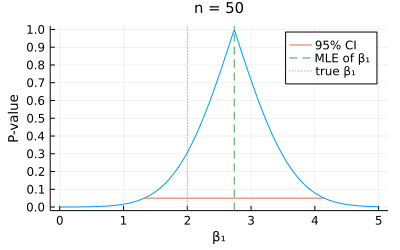

In [48]:
# ロジスティック回帰モデルのサンプル(データ)の生成
Random.seed!(46493735964)
β₀, β₁ = β = [-4, 2]
n = 1000
x = rand(Uniform(-β₀/β₁-2, -β₀/β₁+2), n)
y = logistic_rand(x, β)

# P値函数と信頼区間の動画
ran = [fill(50, 20); 50:100; 100:2:200; 200:4:400; 600:8:n; fill(n, 20)]
@time anim = @animate for m in ran
    @views X, Y = x[1:m], y[1:m]
    β̂₀, β̂₁ = β̂ = logistic_mle(Y, X)
    ci = confint_beta1_wald(Y, X)
    plot(β₁ -> pvalue_beta1_wald(Y, X, β₁), 0, 5; label="")
    plot!(yguide="P-value", xguide="β₁")
    plot!(ytick=0:0.1:1, ylim=(-0.02, 1.02))
    plot!(ci, fill(0.05, 2); label="95% CI")
    vline!([β̂₁]; label="MLE of β₁", ls=:dash) # maximum likelihood estimate of β₁
    vline!([β₁]; label="true β₁", ls=:dot)
    title!("n = $m")
end

gif(anim, "images/anim_logisticreg_beta1_confint_pvalfunc.gif")

PDFファイルではこのアニメーションは動かない.  動いている様子を見たい人は以下のリンク先を参照せよ.

* [ロジスティック回帰のβ₁の信頼区間に対応するP値函数](https://github.com/genkuroki/Statistics/blob/master/2022/images/anim_logisticreg_beta1_confint_pvalfunc.gif)

## xᵢ 達の値も1または0の場合のロジスティック回帰

$x_i$ 達の値も1または0の場合のロジスティック回帰によって, 

* [「検定と信頼区間: 比率の比較」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/11%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20proportions.ipynb)

におけるオッズ比パラメータに関する検定や信頼区間に関する結果を再現できることを説明しよう.

すなわち, ロジスティック回帰は「比率の比較」を含んでいる.

このことは, 線形回帰が「平均の推定」を含んでいることに似ている.

以下の説明は __スコア統計量__ や __Fisher情報量行列__ などを使う統計分析の方法への入門的解説にもなっている.

### xᵢ 達の値も1または0の場合にロジスティック回帰モデルは2つの二項分布モデルに等しい

$x=[x_i]_{i=1}^n\in\{1,0\}^n$ であると仮定する.

$X,Y\in\{1,0\}$ について, $n_{XY}$ を $(x_i, y_i)=(X,Y)$ となる $i$ の個数と定め, $n_X$ を $x_i=X$ となる $i$ の個数と定める.  これによって次の $2×2$ の分割表が得られる:

$$
\begin{array}{c|c|c|c}
    & Y=1    & Y=0    & \\
\hline
X=1 & n_{11} & n_{10} & n_1 \\
\hline
X=0 & n_{01} & n_{00} & n_0 \\
\end{array}
\qquad \left(\sum_{X,Y} n_{X,Y} = \sum_X n_X = n\right).
$$

行列 $N$ を次のように定める:

$$
N = \begin{bmatrix}
n_{11} & n_{10} \\
n_{01} & n_{00} \\
\end{bmatrix}
$$

さらに, $p=p(\beta)$ と $q=q(\beta)$ を次のように定める:

$$
p = p(\beta) = \logistic(\beta_0 + \beta_1), \quad
q = q(\beta) = \logistic(\beta_0).
$$

これは

$$
\log\frac{p}{1-p} = \beta_0 + \beta_1, \quad
\log\frac{q}{1-q} = \beta_0
$$

と同値なので,

$$
\beta_1 = \log\frac{p(1-q)}{(1-p)q} =
(\text{パラメータの対数オッズ比}).
$$

ロジスティック回帰の統計モデルの確率質量函数は $N$ に関する次の確率質量函数に書き直される:

$$
P(N|n_1, n_0, p, q) =
\binom{n_1}{n_{11}}p^{n_{11}}(1-p)^{n_{10}}\cdot
\binom{n_0}{n_{01}}q^{n_{01}}(1-q)^{n_{00}}.
$$

要するにこの節で扱っている最も簡単な場合のロジスティック回帰モデルは2つの二項分布モデルを含んでいる.

### xᵢ 達の値も1または0の場合のスコア統計量とFisher情報行行列

このとき, スコア統計量は次のようになる:

$$
\begin{aligned}
&
A = A(\beta) =
-n_{11}(1-p) + n_{10}p - n_{01}(1-q) + n_{00}q =
n_1 p - n_{11} + n_0 q - n_{01},
\\ &
B = B(\beta) =
-n_{11}(1-p) + n_{10}p =
n_1 p - n_{11}.
\end{aligned}
$$

最尤法の解 $\betahat$ に対応する $\hp = p(\betahat)$, $\hq=q(\betahat)$ は $A=0$, $B=0$ の解になっているので,

$$
\hp = \frac{n_{11}}{n_1} = \frac{n_{11}}{n_{11}+n_{10}}, \quad
\hq = \frac{n_{01}}{n_0} = \frac{n_{01}}{n_{01}+n_{00}}.
$$

Fisher情報量行列の成分達は次のようになる:

$$
\begin{aligned}
&
a = a(\beta) = n_1 p(1-p) + n_0 q(1-q),
\\ &
b = b(\beta) = n_1 p(1-p),
\\ &
c = c(\beta) = n_1 p(1-p).
\end{aligned}
$$

ゆえに, $\ha=a(\betahat)$, $\hb=b(\betahat)$, $\hc=c(\betahat)$ は次のようになる:

$$
\ha = \frac{n_{11}n_{10}}{n_1} + \frac{n_{01}n_{00}}{n_0}, \quad
\hb =
\hc = \frac{n_{11}n_{10}}{n_1}.
$$

### xᵢ 達の値も1または0の場合のWald型のP値函数と信頼区間

したがって,

$$
\SEhat_{\betahat_1} =
\sqrt{\frac{\ha}{\ha\hc-\hb^2}} =
\sqrt{\frac{1}{n_{11}}+\frac{1}{n_{10}}+\frac{1}{n_{01}}+\frac{1}{n_{00}}}.
$$

ゆえに

$$
\hz(\beta_1) = \frac{\betahat_1 - \beta_1}{\SEhat_{\betahat_1}}.
$$

の分母の具体系がわかったので, パラメータの対数オッズ比が $\beta_1$ であるという仮説のWald型P値函数

$$
\pvalue_{\Wald}(N|\beta_1) = 2(1 - \cdf(\Normal(0,1), |\hz(\beta_1)|))
$$

や対数オッズ比 $\beta_1$ に関するWald型信頼区間

$$
\confint^{\beta_1}_{\Wald}(N|\alpha) =
\left[
\betahat_1 - z_{\alpha/2}\SEhat_{\betahat_1},\;
\betahat_1 + z_{\alpha/2}\SEhat_{\betahat_1}
\right]
$$

の計算の仕方がよく分かったことになる. 

以上の結果は

* [「検定と信頼区間: 比率の比較」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/11%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20proportions.ipynb)

における「Wald版のオッズ比に関するP値と信頼区間」の再現になっている.

### xᵢ 達の値も1または0の場合のWilson型のP値函数と信頼区間

#### A=0で定まる条件付き確率分布の正規分布近似

この節ではスコア統計量の分布の正規分布近似に戻って考え直す:

$$
U(\beta) = \begin{bmatrix} A(\beta) \\ B(\beta) \end{bmatrix}
\sim \MvNormal(0, I(\beta)), \ \text{approximately}.
$$

$I(\beta)$ の成分は $a(\beta), b(\beta), c(\beta)$ と表されているのであった.

回帰係数パラメータの片方の $\beta_1$ (対数オッズ比パラメータ)を任意に固定して, $\beta_0$ のみを動かして得られる最尤法(尤度最大化)の解を $\betatilde_0$ と書き,

$$
\betatilde = \begin{bmatrix} \betatilde_0 \\ \beta_1 \end{bmatrix}
$$

とおく.  このとき, $\betatilde_0$ は, 与えられた $\beta_1$ に対する方程式

$$
A = A(\beta) = A\left(\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix}\right) = 0
$$

の解になる. ゆえに, $U(\betatilde)$ が従う分布は $U(\beta)$ が従う分布を $A(\beta)=0$ の場合に制限して得られる条件付き確率分布になる.  このことから, 次が成立することがわかる:

$$
B(\betatilde) \sim \Normal\left(0, \sqrt{\frac{\ta\tc-\tb^2}{\ta}}\right), \ \text{approximately}.
$$

ここで, $\ta, \tb, \tc$ は $\beta=\betatilde$ のときの $a,b,c$ である:

$$
\ta = a(\betatilde), \quad
\tb = a(\betatilde), \quad
\tc = a(\betatilde).
$$

$\ta/(\ta\tc-\tb^2)$ が $I(\betatilde)^{-1}$ の $(2,2)$ 成分に等しいことに注意せよ. (2変量正規分布の条件付き確率分布について自分で計算してみて, そうなる理由を確認せよ.)

この結果を有用にするためには $\betatilde_0$ を求め, $\ta, \tb, \tc, B(\betatilde)$ の具体的な形を決定する必要がある. 以下ではそれを実行しよう.

#### 与えられた対数オッズ比パラメータの値 β₁ に対する β₀ の推定量に関する公式

__公式:__ $\betatilde_0$ と $\ta, \tb, \tc, B(\betatilde)$ の具体的な形は次のようになる:

$$
\begin{aligned}
&
\betahat_0 = \log\frac{n_{01}+\deltatilde}{n_{00}-\deltatilde}, 
\\ &
\ta = 
\frac{(n_{11}-\deltatilde)(n_{10}+\deltatilde)}{n_1} +
\frac{(n_{01}+\deltatilde)(n_{00}-\deltatilde)}{n_0},
\\ &
\tb = \tc = \frac{(n_{11}-\deltatilde)(n_{10}+\deltatilde)}{n_1},
\\ &
B(\betatilde) =  -\deltatilde.
\end{aligned}
$$

ただし, $\deltatilde$ は

$$
\omega = \exp(\beta_1), \quad
A = 1 - \omega, \quad
B = n_{11} + n_{00} + \omega(n_{10} + n_{01}), \quad
C = n_{11}n_{00} - \omega n_{01}n_{10}
$$

とおいて, 次のように定義される:

$$
\deltatilde = \frac{2C}{B + \sqrt{B^2 - 4AC}}.
$$

__証明:__ $A(\beta)$ の具体的な形は

$$
\begin{aligned}
&
A(\beta) = -n_{11}(1-p) + n_{10}p - n_{01}(1-q) + n_{00}q = n_1 p - n_{11} + n_0 q - n_{01},
\\ &
\frac{q}{1-q} = \exp(\beta_0),
\quad
\frac{p(1-q)}{(1-p)q} = \exp(\beta_1)
\end{aligned}
$$

だったので, 与えられた $\beta_1$ に対する $\beta_0$ に関する方程式 $A(\beta)=0$ は次と同値である:

$$
\delta := n_{11} - n_1 p = -(n_{01} - n_0 q).
$$

このとき,

$$
p = \frac{n_{11}-\delta}{n_1}, \quad 1-p=\frac{n_{10}+\delta}{n_1}, \quad
q = \frac{n_{01}+\delta}{n_0}, \quad 1-q=\frac{n_{00}-\delta}{n_0}
$$

なので, 条件 $((p(1-q))/((1-p)q)) = \exp(\beta_1)$ は次のように書き直される:

$$
\frac{(n_{11}-\delta)(n_{00}-\delta)}{(n_{10}+\delta)(n_{00}+\delta)} = \exp(\beta_1).
$$

これを $\delta$ に関する2次方程式に直してから解くと, その解は

$$
\deltatilde = \frac{2C}{B + \sqrt{B^2 - 4AC}}.
$$

ここで, 

$$
\omega = \exp(\beta_1), \quad
A = 1 - \omega, \quad
B = n_{11} + n_{00} + \omega(n_{10} + n_{01}), \quad
C = n_{11}n_{00} - \omega n_{01}n_{10}.
$$

$\tp, \tq$ を次のように定める:

$$
\tp = \frac{n_{11}-\deltatilde}{n_1}, \quad
\tq = \frac{n_{01}+\deltatilde}{n_0}.
$$

このとき, $\beta_0$ に関する方程式 $A(q)=0$ は次のように解ける:

$$
\betahat_0 = \log\frac{\tq}{1 - \tq} =
\log\frac{n_{01}+\deltatilde}{n_{00}-\deltatilde}.
$$

そして, このとき,

$$
\begin{aligned}
&
\ta = n_1 \tp(1-\tp) + n_0 \tq(1-\tq) =
\frac{(n_{11}-\deltatilde)(n_{10}+\deltatilde)}{n_1} +
\frac{(n_{01}+\deltatilde)(n_{00}-\deltatilde)}{n_0},
\\ &
\tb = \tc = n_1 \tp(1-\tp) =
\frac{(n_{11}-\deltatilde)(n_{10}+\deltatilde)}{n_1},
\\ &
B(\betatilde) = n_1 \tp - n_{11} = -\deltatilde.
\end{aligned}
$$

これで $B(\betatilde)$ の具体的な形がわかった. __証明終__

#### 対数オッズ比パラメータ β₁ に関するWilson型のP値函数と信頼区間の構成

以上の結果と $n_{11}+n_{10}=n_1$, $n_{01}+n_{00}=n_0$ より,

$$
\begin{aligned}
\frac{\ta}{\ta\tc-\tb^2} &=
\frac
{\dfrac{(n_{11}-\deltatilde)(n_{10}+\deltatilde)}{n_1} +
\dfrac{(n_{01}+\deltatilde)(n_{00}-\deltatilde)}{n_0}}
{\dfrac{(n_{11}-\deltatilde)(n_{10}+\deltatilde)}{n_1}
\dfrac{(n_{01}+\deltatilde)(n_{00}-\deltatilde)}{n_0}}
\\ &=
\frac{n_1}{(n_{11}-\deltatilde)(n_{10}+\deltatilde)} +
\frac{n_1}{(n_{01}+\deltatilde)(n_{00}-\deltatilde)}
\\ &=
\frac{1}{n_{11}-\deltatilde} + \frac{1}{n_{10}+\deltatilde} +
\frac{1}{n_{01}+\deltatilde} + \frac{1}{n_{00}-\deltatilde}.
\end{aligned}
$$

したがって, 

$$
B(\betatilde) \sim \Normal\left(0, \sqrt{\frac{\ta\tc-\tb^2}{\ta}}\right), \ \text{approximately}.
$$

という結果は次のように書き直される:

$$
z(\beta_1) := \deltatilde\,\SEhat_{\deltatilde}^{-1} \sim \Normal(0,1), \ \text{approximately}. 
$$

ここで,

$$
\SEhat_{\deltatilde}^{-1} =
\sqrt{\frac{\ta}{\ta\tc-\tb^2}} =
\sqrt{\frac{1}{n_{11}-\deltatilde} + \frac{1}{n_{10}+\deltatilde} +
\frac{1}{n_{01}+\deltatilde} + \frac{1}{n_{00}-\deltatilde}}.
$$

さらにこれは, 次と同値である:

$$
\chi^2(\beta_1) := z(\beta_1)^2 =
\deltatilde^2\,\SEhat_{\deltatilde}^{-2} \sim \Chisq(1), \ \text{approximately}. 
$$

これより, 「対数オッズ比パラメータは $\beta_1$ である」という仮説のWilson型の(スコア検定の)P値函数が以下のように定義される:

$$
\pvalue_{\Wilson}(N|\beta_1) =
2(1-\cdf(\Normal(0,1), |z(\beta_1)|) =
\cdf(\Chisq(1), \chi^2(\beta_1)).
$$

さらに, Wilson型(スコア検定に付随する)信頼区間が次のように得られる:

$$
\confint^{\beta_1}_{\Wilson}(N|\alpha) =
\{\,\beta_1\in\R\mid \pvalue_{\Wilson}(N|\beta_1) \ge \alpha\,\}.
$$

以上の結果は

* [「検定と信頼区間: 比率の比較」のノート](https://nbviewer.org/github/genkuroki/Statistics/blob/master/2022/11%20Hypothesis%20testing%20and%20confidence%20interval%20-%20Two%20proportions.ipynb)

における「Pearsonのχ²検定版のオッズ比に関するP値と信頼区間」の再現になっている.  信頼区間の計算法のより詳しい説明や計算の例もそちらにある.

### xᵢ 達の値も1または0の場合にロジスティック回帰の一般化の役に立ち方

$x_i=(X_i, k)\in\{1,0\}\times\{1,\ldots,K\}$ が $X_i = 1,0$ と $k=1,2,\ldots,K$ の組である場合への以上の話の一般化は, $K$ 個の統計分析の結果をまとめあげる __メタアナリシス__ などでも役に立っている.

例えば, $K$ 個の統計分析に関する共通オッズ比を推定するためのMantel-Haenszel統計量の話やMantel-Haenszel検定の話をインターネットで検索してみよ.  共通オッズ比のMantel-Haenszel検定はロジスティック回帰を使った検定と本質的に同値になっている.

* [共通オッズ比 Mantel-Haenszel統計量](https://www.google.com/search?q=%E5%85%B1%E9%80%9A%E3%82%AA%E3%83%83%E3%82%BA%E6%AF%94+Mantel-Haenszel%E7%B5%B1%E8%A8%88%E9%87%8F)
* [Mantel-Haenszel検定](https://www.google.com/search?q=Mantel-Haenszel%E6%A4%9C%E5%AE%9A)

検索すれば, $x_i$ 達が離散的な値を取る場合のロジスティック回帰は医療統計でよく使われていることがわかるだろう.

このように, ロジスティック回帰は機械学習の文脈で解説されることが多いが, 医療統計でも使われている.

将来, 機械学習の技術を利用しようと思っている人も, それとは毛色が違う医療統計についても学んでおけば, アイデアの幅が広がり, オリジナルな仕事をできるかもしれない.